<a href="https://colab.research.google.com/github/Suraj-7077/Unsupervised-ML-Book-Recommendation-system-Model/blob/main/Unsupervised_ML_Capstone_Project_IV_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



## **Project Type**    - EDA / Unsupervised ML / Recommendation System 
## **Project Title** - Book Recommendation System
## **Contribution**    - Individual

## **Contributor** - Suraj Shrikant Galande 

# **Project Summary -**

**During** **the** **last** **few** **decades**, **with** **the** **rise** of **Youtube**, **Amazon**, **Netflix**, **and** **many**
**other such web services**, **recommender systems have taken more and more place**
**in our lives**  . **From e-commerce** (**suggest to buyers articles that could interest them)** **to online advertisement (suggest to users the right contents, matching their preferences)**, **recommender systems are today unavoidable in our daily online journeys**.    

**In a very general way**, **recommender systems are algorithms aimed at suggesting**
**relevant items to users** **(items being movies to watch, text to read, products to buy, or anything else depending on industries)**. 

**Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors**. 

**The main objective of this project is to create a book recommendation system for users**.


# **GitHub Link -**

https://github.com/Suraj-7077/Unsupervised-ML-Book-Recommendation-system-Model.git

# **Problem Statement**


**In some industries, the use of recommender systems is crucial because, when we implemented it well, then they can be extremely profitable and set themselves apart from their competitors**. 

**Online book selling websites nowadays are competing with each other. One of the most effective strategies for increasing sales,enhancing customers experience and retaining customers is done by building an efficient Recommendation system.**

**The book recommendation system must recommend books that makes interests to buyers.** 

**Popularity based approach and Collaborative Filtering (CF) approach are used in this project to build book recommendation systems Model.**



# **Dataset Description**

Dataset used in this project is from Amazon Web services.

It Contains Three Datasets - 

1) Users Dataset :-  

Contains Features as           
                   
                    i) User-ID: A unique identification number for each user

                    ii) Location:It contains city,state and country to which the user belongs ,separated by commas

                    iii) Age:The age of the users 

2) Books Dataset :-  
Contains features as 

         i) SBN:International Standard Book Number unique to each edition of the book
        ii) Book-Title:Title of the book
        iii) Book-Author:Author of the book(incase of several authors only the first is provided)
        iv) Year-of-Publication:The year in which the particular edition of the book was published
        v) Publisher:Name of the Book Publishing company
        vi) Image-URL-S: URL link to a small version of the book cover displayed on the Amazon website
        vii) Image-URL-M: URL link to Medium version image of the book cover displayed on the Amazon website
       viii) Image-URL-L: URL link to Large sized image of the book cover displayed on the Amazon website 

3) Ratings Dataset :-  
Contains Features as 

           i)  User-ID:as mentioned above
           ii) ISBN:as mentioned above
           iii) Book-Rating: The rating given by the user (identified by User-ID) for the book (identified by ISBN). 
           It is either explicit,expressed on a scale from 1-10 (higher values denoting higher appreciation), 
           or implicit,expressed by 0 ( i.e. Lower appreciation).



# Importing libraries

In [1]:
# Importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Loading Datasets

In [2]:
users_df = pd.read_csv('/content/drive/MyDrive/ Capstone project/Unsupervised ML Book Recommendation Project/Users.csv')

In [3]:
books_df = pd.read_csv('/content/drive/MyDrive/ Capstone project/Unsupervised ML Book Recommendation Project/Books.csv')

In [4]:
ratings_df = pd.read_csv('/content/drive/MyDrive/ Capstone project/Unsupervised ML Book Recommendation Project/Ratings.csv')

In [5]:
users_df.head(4)              # Looking first 4 observations of user dataset

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0


In [6]:
books_df.head(4)              # looking first 4 observations of books dataset

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


In [7]:
ratings_df.head(4)          # looking first 4 rows of ratings datset

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3


In [8]:
print(f' shape of users dataset = {users_df.shape},\n\n shape of books dataset = {books_df.shape},\n\n shape of ratings dataset = {ratings_df.shape}')

 shape of users dataset = (278858, 3),

 shape of books dataset = (271360, 8),

 shape of ratings dataset = (1149780, 3)


In [9]:
users_df.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [10]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [11]:
ratings_df.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

# 1) mergings datasets

### Merging books and Ratings dataset since both datasets contains same column name as ISBN 

In [12]:
book_ratings_df = pd.merge(left= books_df, right= ratings_df, how='left', left_on= 'ISBN', right_on= 'ISBN')

In [13]:
book_ratings_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0


In [14]:
book_ratings_df.shape

(1032345, 10)

In [15]:
book_ratings_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating'],
      dtype='object')

# Checking null values in book ratings dataframe

In [16]:
book_ratings_df.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               1
Year-Of-Publication       0
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               4
User-ID                1209
Book-Rating            1209
dtype: int64

### Thus we see that [Book-Author, Publisher, Image-URL-L, User-ID, Book-Rating] these columns contains some missing observations.

### But as compare to our book-ratings-df shape we have very few observations are missing. If we drop them then it wont affect our data analysis.

In [17]:
book_ratings_df.isnull().sum().sum()

2425

### Thus there are 2425 missing observations out of 1032345 which is very few.

### So droping it.

In [18]:
book_ratings_df= book_ratings_df.dropna()

In [19]:
book_ratings_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
User-ID                0
Book-Rating            0
dtype: int64

### So we have succesfully handeled our book ratings dataset.

# Now we can merge User_df to out book_ratings dataframe

### Since both dataframe have common user-ID coulmn

In [20]:
users_book_ratings_df = pd.merge(left= book_ratings_df, right= users_df, how= 'right', left_on='User-ID', right_on='User-ID')

In [21]:
users_book_ratings_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,"nyc, new york, usa",NaN
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,"moscow, yukon territory, russia",NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,"porto, v.n.gaia, portugal",17.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,"farnborough, hants, united kingdom",NaN


In [22]:
users_book_ratings_df.shape

(1217881, 12)

In [23]:
users_book_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1217881 entries, 0 to 1217880
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   ISBN                 1031129 non-null  object 
 1   Book-Title           1031129 non-null  object 
 2   Book-Author          1031129 non-null  object 
 3   Year-Of-Publication  1031129 non-null  object 
 4   Publisher            1031129 non-null  object 
 5   Image-URL-S          1031129 non-null  object 
 6   Image-URL-M          1031129 non-null  object 
 7   Image-URL-L          1031129 non-null  object 
 8   User-ID              1217881 non-null  float64
 9   Book-Rating          1031129 non-null  float64
 10  Location             1217881 non-null  object 
 11  Age                  867505 non-null   float64
dtypes: float64(3), object(9)
memory usage: 120.8+ MB


### Since in our final data we have some null values in columns.

### In later we will deal with them. 

##  **Statistical summary of users book ratings dataset**

In [24]:
users_book_ratings_df.describe(include='all')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
count,1031129,1031129,1031129,1031129.0,1031129,1031129,1031129,1031129,1.217881e+06,1.031129e+06,1217881,867505.000000
unique,270145,241066,101585,200.0,16725,269836,269836,269836,NaN,NaN,57339,NaN
top,0971880107,Wild Animus,Stephen King,2002.0,Ballantine Books,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,NaN,NaN,"toronto, ontario, canada",NaN
freq,2502,2502,10053,87275.0,34724,2502,2502,2502,NaN,NaN,16162,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.404038e+05,2.839039e+00,NaN,36.984160
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.051888e+04,3.854152e+00,NaN,14.153954
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.033800e+04,0.000000e+00,NaN,28.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.408520e+05,0.000000e+00,NaN,35.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.111520e+05,7.000000e+00,NaN,45.000000


This displays summary of statistics of dataframe

Information of different descriptive statistics :-

1) Measures of Frequency :- Count, Percent, Frequency.

2) Measures of Central Tendency :- Mean, Median, and Mode.

3)Measures of Dispersion or Variation or spread :- Range( max - min ),Variance, Standard Deviation.

4) Measures of Position :- Percentile Ranks, Quartile Ranks.

## Checking null values in users book ratings dataset 

In [25]:
users_book_ratings_df.isnull().sum()

ISBN                   186752
Book-Title             186752
Book-Author            186752
Year-Of-Publication    186752
Publisher              186752
Image-URL-S            186752
Image-URL-M            186752
Image-URL-L            186752
User-ID                     0
Book-Rating            186752
Location                    0
Age                    350376
dtype: int64

We see that some feature has lot of null values presents.

# Checking percentage of missing values in features.

In [26]:
print(users_book_ratings_df.isnull().sum()/ len(users_book_ratings_df)*100)

ISBN                   15.334175
Book-Title             15.334175
Book-Author            15.334175
Year-Of-Publication    15.334175
Publisher              15.334175
Image-URL-S            15.334175
Image-URL-M            15.334175
Image-URL-L            15.334175
User-ID                 0.000000
Book-Rating            15.334175
Location                0.000000
Age                    28.769313
dtype: float64


So we see that percentage of missing values in our final dataframe.

Since as compare to observations in our dataframe Null values are in less numbers. for better analysis and better model building we can drop missing values, bcoz it wont affect our dataset. 

In [27]:
users_book_ratings_df = users_book_ratings_df.dropna()

In [28]:
users_book_ratings_df.shape

(753296, 12)

In [29]:
users_book_ratings_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

In [30]:
users_book_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753296 entries, 1 to 1217867
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 753296 non-null  object 
 1   Book-Title           753296 non-null  object 
 2   Book-Author          753296 non-null  object 
 3   Year-Of-Publication  753296 non-null  object 
 4   Publisher            753296 non-null  object 
 5   Image-URL-S          753296 non-null  object 
 6   Image-URL-M          753296 non-null  object 
 7   Image-URL-L          753296 non-null  object 
 8   User-ID              753296 non-null  float64
 9   Book-Rating          753296 non-null  float64
 10  Location             753296 non-null  object 
 11  Age                  753296 non-null  float64
dtypes: float64(3), object(9)
memory usage: 74.7+ MB


Since now we have no null values in our dataset.

As looking above code result we see that User-ID is float datatype, but User-ID cant be in decimal, so changing its datatype to integer.

In [31]:
users_book_ratings_df['User-ID'] = users_book_ratings_df['User-ID'].astype(int)

In [32]:
users_book_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753296 entries, 1 to 1217867
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 753296 non-null  object 
 1   Book-Title           753296 non-null  object 
 2   Book-Author          753296 non-null  object 
 3   Year-Of-Publication  753296 non-null  object 
 4   Publisher            753296 non-null  object 
 5   Image-URL-S          753296 non-null  object 
 6   Image-URL-M          753296 non-null  object 
 7   Image-URL-L          753296 non-null  object 
 8   User-ID              753296 non-null  int64  
 9   Book-Rating          753296 non-null  float64
 10  Location             753296 non-null  object 
 11  Age                  753296 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 74.7+ MB


In [33]:
users_book_ratings_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,0.0,"stockton, california, usa",18.0
27,1841721522,New Vegetarian: Bold and Beautiful Recipes for...,Celia Brooks Brown,2001,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,http://images.amazon.com/images/P/1841721522.0...,10,0.0,"albacete, wisconsin, spain",26.0
46,0375759778,Prague : A Novel,ARTHUR PHILLIPS,2003,Random House Trade Paperbacks,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,http://images.amazon.com/images/P/0375759778.0...,19,7.0,"weston, ,",14.0
47,0425163091,Chocolate Jesus,Stephan Jaramillo,1998,Berkley Publishing Group,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...,http://images.amazon.com/images/P/0425163091.0...,20,0.0,"langhorne, pennsylvania, usa",19.0
69,067176537X,The Therapeutic Touch: How to Use Your Hands t...,Dolores Krieger,1979,Fireside,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,http://images.amazon.com/images/P/067176537X.0...,36,0.0,"montreal, quebec, canada",24.0


###  Now we are ready to explore our datasets

# EDA on our users_book_ratings data

## Checking distribution of book ratings 

### looking  how many ratings books have recieved

### grouping by the 'Book-Rating' column, and then counting the number of occurrences of each value of the 'ISBN' column within each group.

In [34]:
users_book_ratings_df.groupby('Book-Rating')['ISBN'].count()

Book-Rating
0.0     483679
1.0        886
2.0       1562
3.0       3331
4.0       5096
5.0      27744
6.0      21445
7.0      45538
8.0      64823
9.0      45249
10.0     53943
Name: ISBN, dtype: int64

Text(0, 0.5, 'books count')

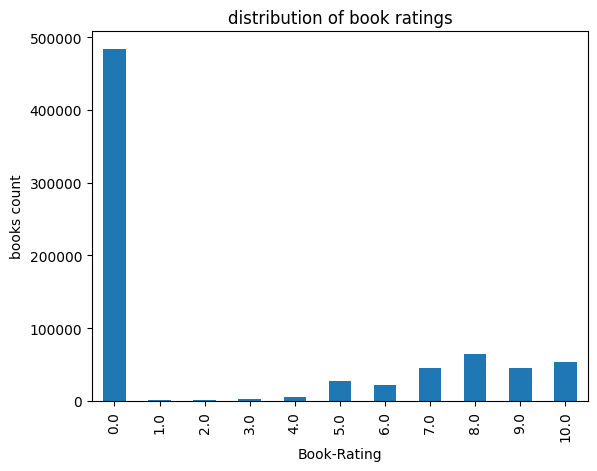

In [35]:
users_book_ratings_df.groupby('Book-Rating')['ISBN'].count().plot.bar()
plt.title('distribution of book ratings')
plt.ylabel('books count')

We see that 483679 number of books has 0 ratings.

# Checking top 10 popular books in our data

## grouping by Book-Title and then counting number of occurances of each value of Book-Ratings column

 



In [36]:
users_book_ratings_df.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending= False)[:10]

Book-Title
Wild Animus                                        2141
The Lovely Bones: A Novel                           920
The Da Vinci Code                                   708
Bridget Jones's Diary                               599
The Nanny Diaries: A Novel                          573
Angels &amp; Demons                                 552
The Secret Life of Bees                             547
A Painted House                                     517
Life of Pi                                          516
Divine Secrets of the Ya-Ya Sisterhood: A Novel     514
Name: Book-Rating, dtype: int64

Text(0, 0.5, 'Book ratings count')

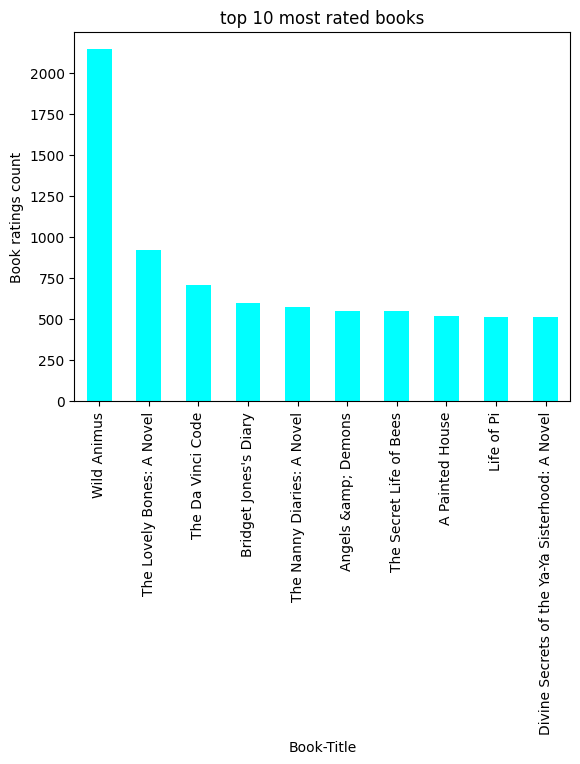

In [37]:
users_book_ratings_df.groupby('Book-Title')['Book-Rating'].count().sort_values(ascending= False)[:10].plot.bar(color='cyan')
plt.title('top 10 most rated books')
plt.ylabel('Book ratings count')

### By above bar plot we see that book title -> Wild Animus has recieved 2141 most number of book ratings among other books in dataset.

### And then followed by book name -> The Lovely Bones: A Novel  has 920 book ratings recieved.

# Checking top 10 popular book authors in our dataset.


### Taking only those books which has book ratings grater than 6
### Grouping by Book-author and then counting number of books from ISBN columns for each group.

In [38]:
popular_authors = users_book_ratings_df[users_book_ratings_df['Book-Rating'] >6].groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:10]

In [39]:
popular_authors

Book-Author
Stephen King          2869
Nora Roberts          1580
John Grisham          1320
J. K. Rowling         1307
James Patterson       1266
Janet Evanovich        861
Dean R. Koontz         819
Mary Higgins Clark     785
Dan Brown              758
Anne Rice              726
Name: ISBN, dtype: int64

Text(0, 0.5, 'number of books')

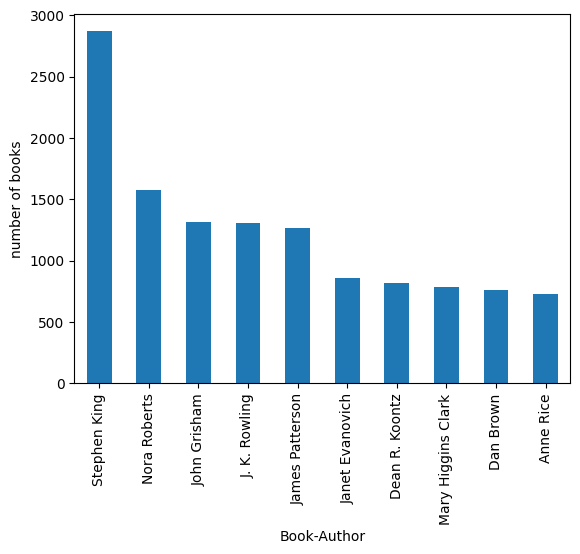

In [40]:
popular_authors.plot.bar()
plt.ylabel('number of books')

### AS we see that book author-> Stephan king has 2869 number of books which all have greater than 6 book rating. So we say that he is most popular book author among readers.

# feature engineering 

### Performing feature engineering on Age column. i.e. creating groups of childrens (age =< 12), young ( 12 < age =< 25 ), matured (25 < age =< 50 ) , olds (age > 50 ).

### Here considering only explicit ratings (i.e. book-ratings !=0)

In [41]:
childrens_readers = users_book_ratings_df[(users_book_ratings_df['Age'] <= 12) & (users_book_ratings_df['Book-Rating'] !=0)]

In [42]:
young_readers = users_book_ratings_df[(users_book_ratings_df['Age'] > 12) & (users_book_ratings_df['Age'] <= 25) & (users_book_ratings_df['Book-Rating'] != 0)]

In [43]:
matured_readers = users_book_ratings_df[(users_book_ratings_df['Age'] > 25) & (users_book_ratings_df['Age'] <= 50) & (users_book_ratings_df['Book-Rating'] !=0)]

In [44]:
old_readers = users_book_ratings_df[(users_book_ratings_df['Age'] > 50) & (users_book_ratings_df['Book-Rating'] !=0)]

In [45]:
print(f'shape of childrens readers is : {childrens_readers.shape}','\n\n' f'shape of young readers is: {young_readers.shape}', '\n\n' f'shape of matured readers is : {matured_readers.shape}','\n\n' f'shape of old readers is : {old_readers.shape}' )

shape of childrens readers is : (2256, 12) 

shape of young readers is: (46887, 12) 

shape of matured readers is : (178074, 12) 

shape of old readers is : (42400, 12)


### From above we see that most of the users in our data are from matured age group.

### and very less no of observation are of users of childrens age group.

# Now let us visualize these age groups by ploting bar plots with respect to there Book ratings given to books.

<function matplotlib.pyplot.show(close=None, block=None)>

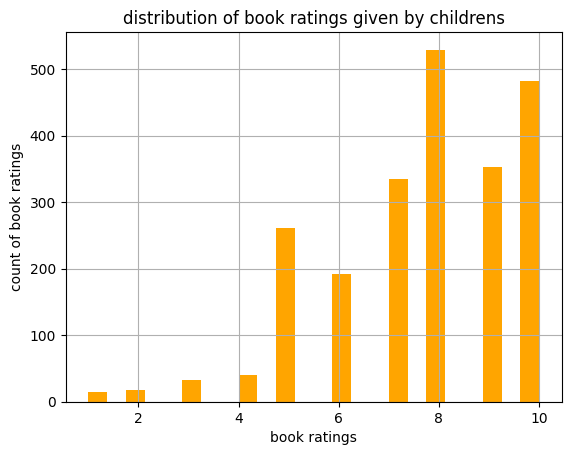

In [46]:
childrens_readers['Book-Rating'].hist(bins=24, color='orange')
plt.title('distribution of book ratings given by childrens')
plt.xlabel('book ratings')
plt.ylabel('count of book ratings')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

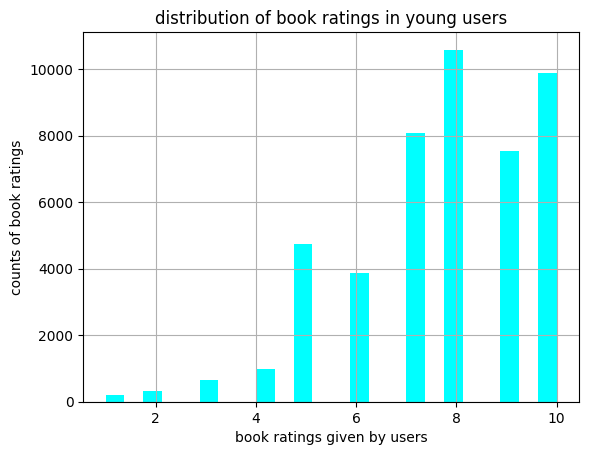

In [47]:
young_readers['Book-Rating'].hist(bins=24, color='cyan')
plt.title('distribution of book ratings in young users')
plt.xlabel('book ratings given by users')
plt.ylabel('counts of book ratings')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

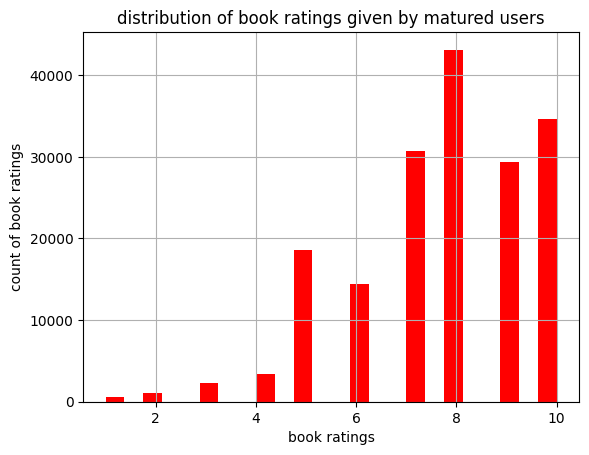

In [48]:
matured_readers['Book-Rating'].hist(bins=24, color='r')
plt.title('distribution of book ratings given by matured users')
plt.xlabel('book ratings')
plt.ylabel('count of book ratings')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

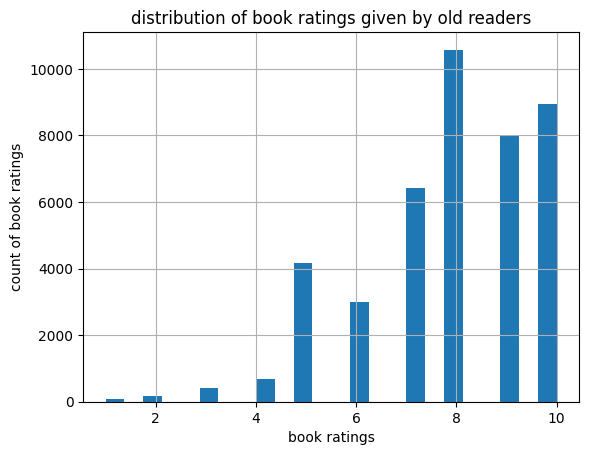

In [49]:
old_readers['Book-Rating'].hist(bins=24)
plt.title('distribution of book ratings given by old readers')
plt.xlabel('book ratings')
plt.ylabel('count of book ratings')
plt.show

### Thus by looking above histograms we say that = 

### 1) Child users has given above 500 times book rating as 8 to various books

### 2) Young readers has given above 10000 times book ratings as 8 to various books.

### 3) matured readers has given above 40000 times  book ratings as 8 to various books

### 4) old readers has given above 10000 times book ratings as 8 to various books

### Since In our dataset we have very few interactions of children users. 

### So it will be better for analysis and model building we focus on other three age groups.

# Now finding popular book authors among Young readers.

### Here we only consider those book authors which has recieved book ratings > 6 i.e. popular books.

Top 5 Authors' Book Ratings distribution among young readers 



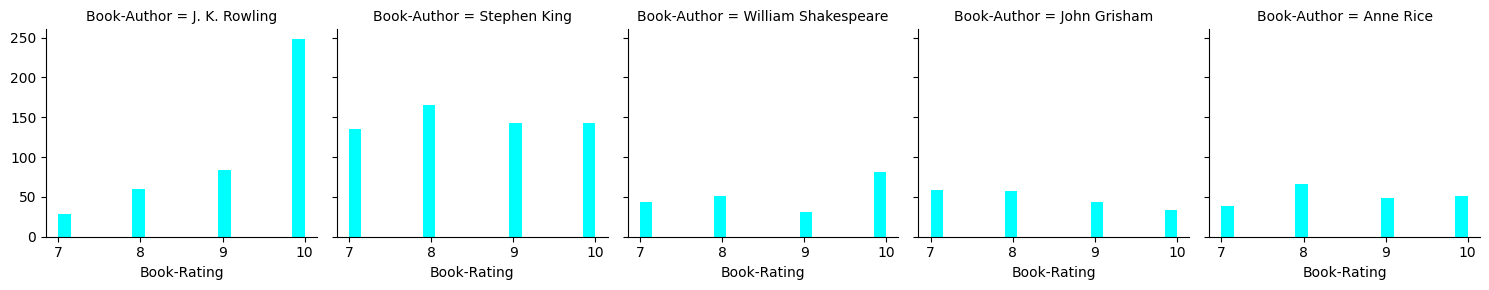

In [50]:
young_readers_1 = young_readers[young_readers['Book-Rating']>6]
popular_authors_among_young = young_readers_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among young readers", '\n')
young_readers_1 = young_readers_1[young_readers_1['Book-Author'].isin(popular_authors_among_young)]
graph = sns.FacetGrid(young_readers_1,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=20,color='cyan')
plt.show()

### As we see that in young users, J.K Rowling, Stephen king, william shakespeare, John grisham, and Anne Rice are the top 5 Book authors popualar among young users.

### out of them Book author J k rowling has recieved almost 250 times book ratings as 10 from users. which shows that young users loves to read J.K Rowling's Books.

# Now finding popular Book Authors among matured age group users.

Top 5 book authors Book ratings distribution among matured users 




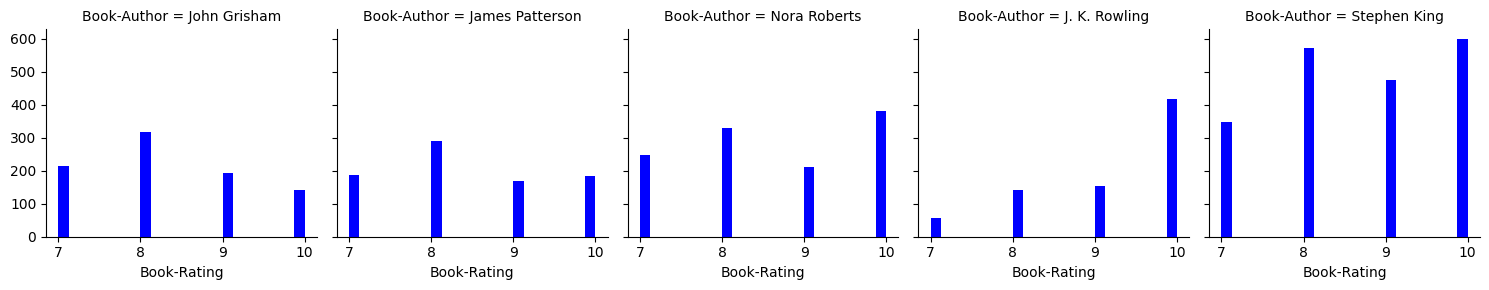

In [51]:
matured_readers_1 = matured_readers[matured_readers['Book-Rating'] >6]
popular_authors_among_matured_users = matured_readers_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending= False)[:5].index
print('Top 5 book authors Book ratings distribution among matured users', '\n\n')
matured_readers_1 = matured_readers_1[matured_readers_1['Book-Author'].isin(popular_authors_among_matured_users)]
graph = sns.FacetGrid(matured_readers_1, col='Book-Author')
graph.map(plt.hist,'Book-Rating', bins=24, color='b')
plt.show()

 ### So we see that In matured users age group, John Grisham, james patterson, Nora Roberts, J.K Rowling, Stephan King are the Top 5 Book Authors. 

 ### Out of them Stephan king has recieved most number of ratings count and most of the users gives 10 as book ratings. 

 ### So we can suggest books of stephan king to  matured age group users.

# Now finding popular book authors among old users

Top 5 Authors' Book Ratings distribution among old readers 




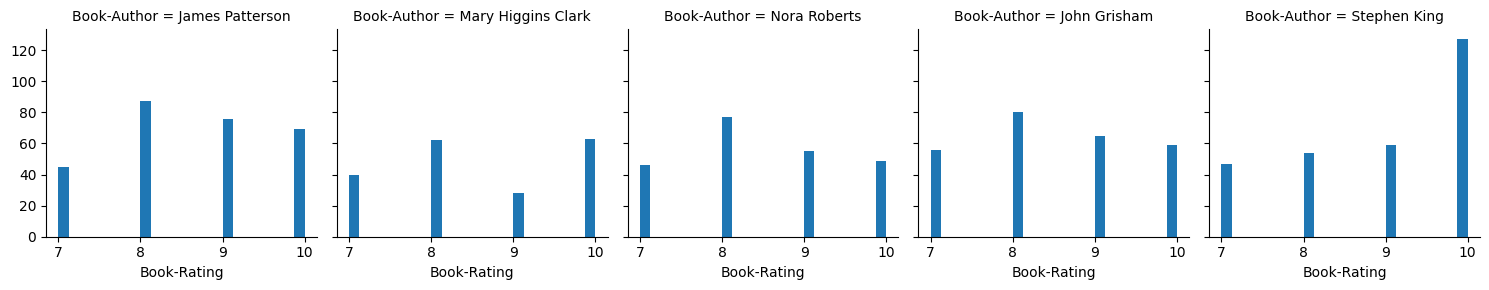

In [52]:
old_readers_1 = old_readers[old_readers['Book-Rating']>6]
popular_authors_among_olds = old_readers_1.groupby('Book-Author')['ISBN'].count().sort_values(ascending=False)[:5].index

print("Top 5 Authors' Book Ratings distribution among old readers", '\n\n')
old_readers_1 = old_readers_1[old_readers_1['Book-Author'].isin(popular_authors_among_olds)]
graph = sns.FacetGrid(old_readers_1,col='Book-Author')
graph.map(plt.hist,'Book-Rating',bins=24)
plt.show()

### We see that in Old users, James patterson, Mary Higgins clark, Nora Roberts, John Grisham, and Stephan King are the top 5 book authors.

### And out of them Stephan king has recievd highest book rating.

### From above all the three age groups we have a common popular book author such as Stephan King and  John Grisham. 

### So we may can suggest these above authors books to any age of users. 

In [53]:
users_book_ratings_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Location', 'Age'],
      dtype='object')

# Now calculating average book ratings for each book

In [54]:
item_book_ratings = users_book_ratings_df.groupby(['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']).agg(book_ratings_count = ('User-ID','count'),avg_book_rating=('Book-Rating','mean')).round(2)

In [55]:
# reseting the index 
item_book_ratings = item_book_ratings.reset_index(level=['ISBN','Book-Title','Book-Author','Publisher','Image-URL-S','Image-URL-M','Image-URL-L'])              # Only removes the given levels from the index

In [56]:
item_book_ratings.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,book_ratings_count,avg_book_rating
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,1,8.0
1,0001010565,Mog's Christmas,Judith Kerr,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,1,0.0
2,0001046713,Twopence to Cross the Mersey,Helen Forrester,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,1,0.0
3,0001046934,The Prime of Miss Jean Brodie,Muriel Spark,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,1,0.0
4,0001047663,Matter Of Honour,Jeffrey Archer,Trafalgar Square Books,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,1,0.0


### filtering dataframe, 
since DataFrame "item_book_ratings" to remove any rows where the value in the "Book-Author" column is equal to "Not Applicable (Na )"

In [57]:
item_book_ratings = item_book_ratings[item_book_ratings['Book-Author'] != 'Not Applicable (Na)']

In [58]:
item_book_ratings.shape

(228996, 9)

### Mean of avg book ratings in item book ratings

In [59]:
item_book_ratings['avg_book_rating'].mean()

2.823651810511974

### Mean of book rating count

In [60]:
item_book_ratings['book_ratings_count'].mean()

3.2895596429631957

# Now Checking Top 10 Rated books 

### based on books which have ratings greater than avg book ratings and has greater rating count than  book rating count 

In [61]:
top_rated_books = item_book_ratings[(item_book_ratings['avg_book_rating'] > 2.82) & (item_book_ratings['book_ratings_count'] > 3.28)]
top_rated_books = top_rated_books.sort_values(by= 'avg_book_rating', ascending = False).head(10)                 # for top 10 observations 

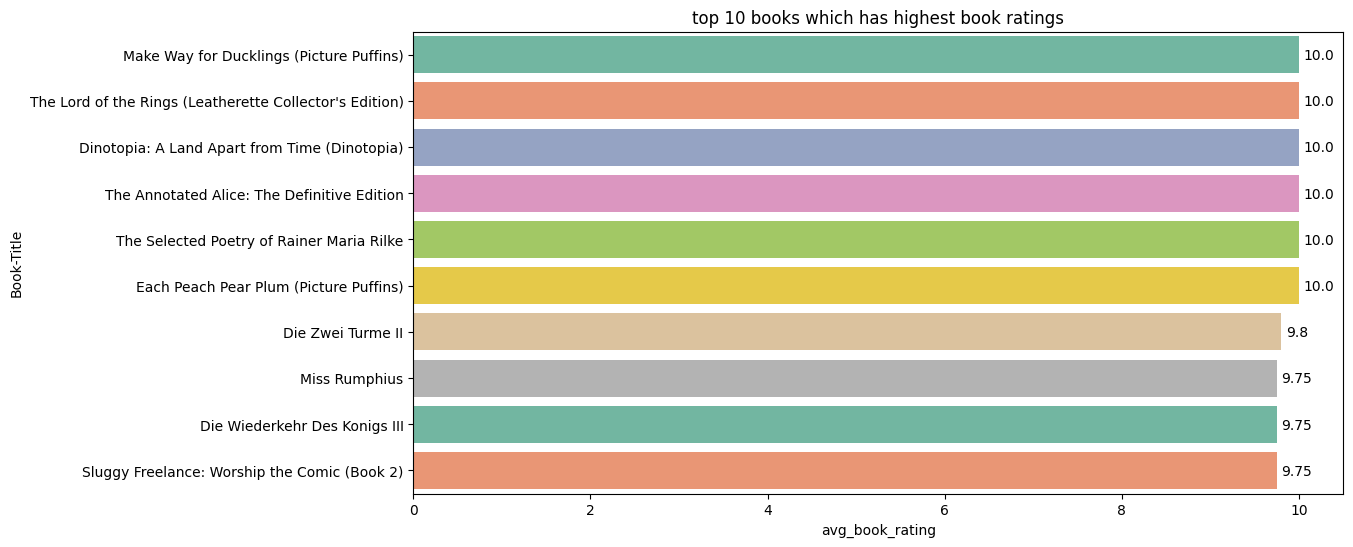

In [62]:
plt.figure(figsize= (12,6))
ax = sns.barplot(data = top_rated_books, x= 'avg_book_rating', y= 'Book-Title', palette = 'Set2')
for i in ax.patches:
    ax.text(i.get_width() + 0.05 , i.get_y() + 0.5 , str(i.get_width()), fontsize = 10)

plt.title('top 10 books which has highest book ratings')
plt.show()

### Thus above are the top 10 rated books & most of them has avg book ratings 10 which is given by users.



# Now Checking Top 10 Voted Books

### That is books which has most rating count or votes recieved

In [63]:
top_voted_books = item_book_ratings.sort_values(by= 'book_ratings_count', ascending= False).head(10)

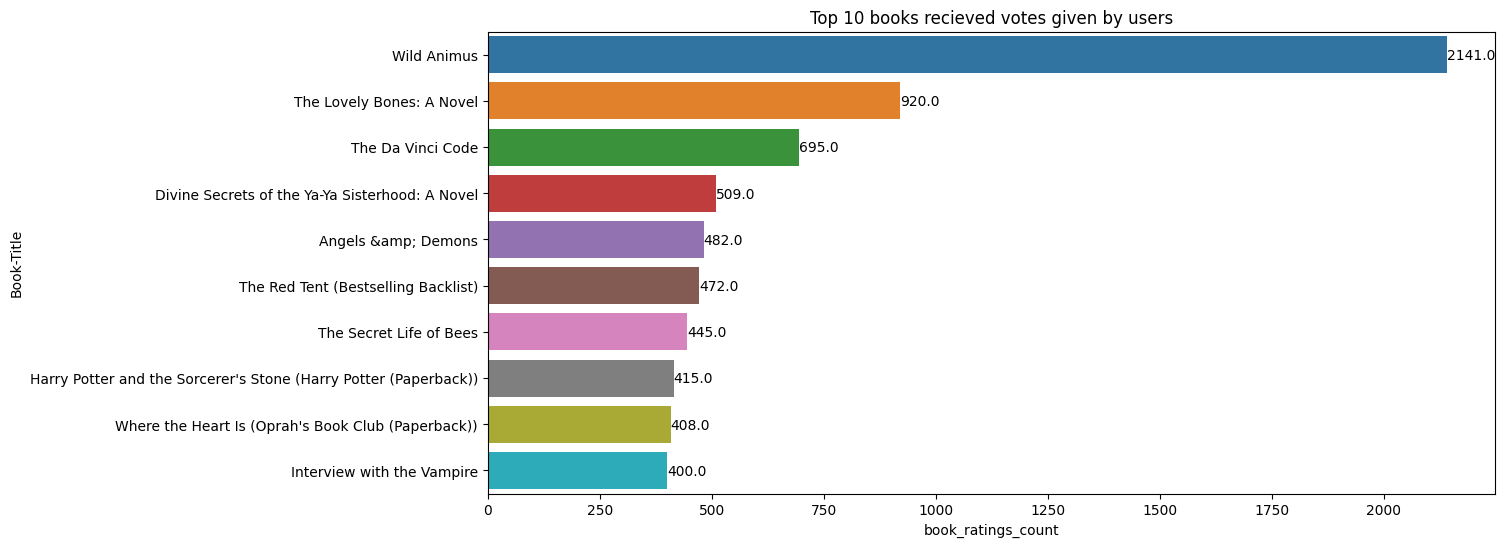

In [64]:
plt.figure(figsize = (13,6))
ax = sns.barplot(data= top_voted_books, x= 'book_ratings_count', y= 'Book-Title')

for i in ax.patches :
  ax.text(i.get_width()+0.05, i.get_y()+0.5, str(i.get_width()), fontsize= 10)

plt.title('Top 10 books recieved votes given by users')
plt.show()

### Thus Above plot gives top 10 books and there book rating count which is given by users or readers.

## Since there are some books which have highest voting count but not good ratings recieved.

## and also there are some books which have good ratings but very less amount of votings recieved.

# Top voted books but not having good ratings

### Looking those books which have book ratings > 6 or avg book rating > 2.82 

In [65]:
list(set(top_voted_books['Book-Title']) - set(top_rated_books['Book-Title']))

['The Secret Life of Bees',
 'The Da Vinci Code',
 "Where the Heart Is (Oprah's Book Club (Paperback))",
 'Divine Secrets of the Ya-Ya Sisterhood: A Novel',
 'Interview with the Vampire',
 "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
 'Wild Animus',
 'The Red Tent (Bestselling Backlist)',
 'Angels &amp; Demons',
 'The Lovely Bones: A Novel']

### So above are the 10 books which have good amount of users votes but users not giving good ratings to them.

# Now checking top rated books but not having good amount of votes

In [66]:
list(set(top_rated_books['Book-Title']) - set(top_voted_books['Book-Title']))

['Sluggy Freelance: Worship the Comic (Book 2)',
 'Die Wiederkehr Des Konigs III',
 'Miss Rumphius',
 'Dinotopia: A Land Apart from Time (Dinotopia)',
 'The Annotated Alice: The Definitive Edition',
 'Make Way for Ducklings (Picture Puffins)',
 'Die Zwei Turme II',
 'The Selected Poetry of Rainer Maria Rilke',
 'Each Peach Pear Plum (Picture Puffins)',
 "The Lord of the Rings (Leatherette Collector's Edition)"]

### So above are the 10 books which have good ratings but has very low amount of voting recieved. This means that these books has read by less users but they have given good ratings to them.

### So we can suggest these books to other users also to read them.

# Let us see the relation between no of book ratings (votes) recieved vs book rating given by users.  

<Axes: xlabel='book_ratings_count', ylabel='avg_book_rating'>

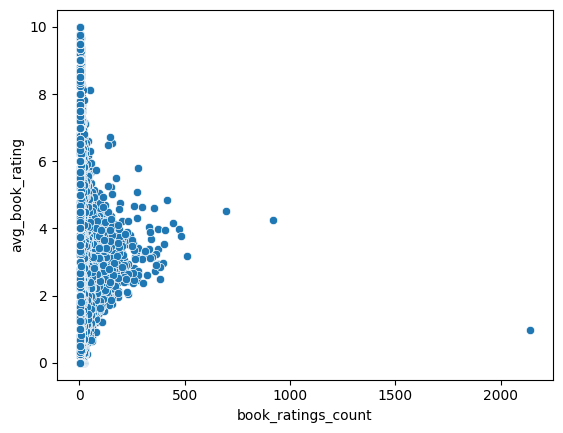

In [67]:
sns.scatterplot(data = item_book_ratings, x = 'book_ratings_count', y='avg_book_rating')


### So we see that as Book rating count increases we see that most of the users tends to give book ratings between 2 to 5 .

### Up till now we have explored and analyzed the data of  book titles and there book ratings.

### Now let us analyze books Authors and there publishers. 

# Looking Book authors and how much they have got Book ratings 

In [68]:
item_book_ratings['Book-Author']

0         C. van Amerongen (translator)
1                           Judith Kerr
2                       Helen Forrester
3                          Muriel Spark
4                        Jeffrey Archer
                      ...              
228991                  Tracy Chevalier
228992              Jeffrey Steingarten
228993                 Elizabeth Buchan
228994                      Jules Verne
228995                      Jules Verne
Name: Book-Author, Length: 228996, dtype: object

We have total 87236 authors in our data

In [69]:
authors_df = item_book_ratings.copy()

defining function to get authors from our dataset :-  

In [70]:
def get_only_authors(Authors) :
  return Authors.split('/')[0]

In [71]:
# Applying function and creating  pr_author column since (pr -public relation is  promotion campaign, an author can attract the attention of their target audience, 
authors_df['pr_author'] = authors_df['Book-Author'].apply(lambda x : get_only_authors(x))

In [72]:
len(authors_df)

228996

### Droping duplicated authors

### since one authors has multiple books in our data

In [73]:
author_total_rating_df = authors_df.drop_duplicates(subset=['pr_author', 'Book-Title'], keep = 'first')

In [74]:
len(author_total_rating_df)

212541

In [75]:
author_total_rating_df = author_total_rating_df.groupby('pr_author').agg(total_ratings_of_author= ('avg_book_rating', 'sum')).reset_index()

# Top 10 authors which have maximum total book ratings

In [76]:
author_total_rating_df = author_total_rating_df.sort_values(by='total_ratings_of_author', ascending=False).head(10)

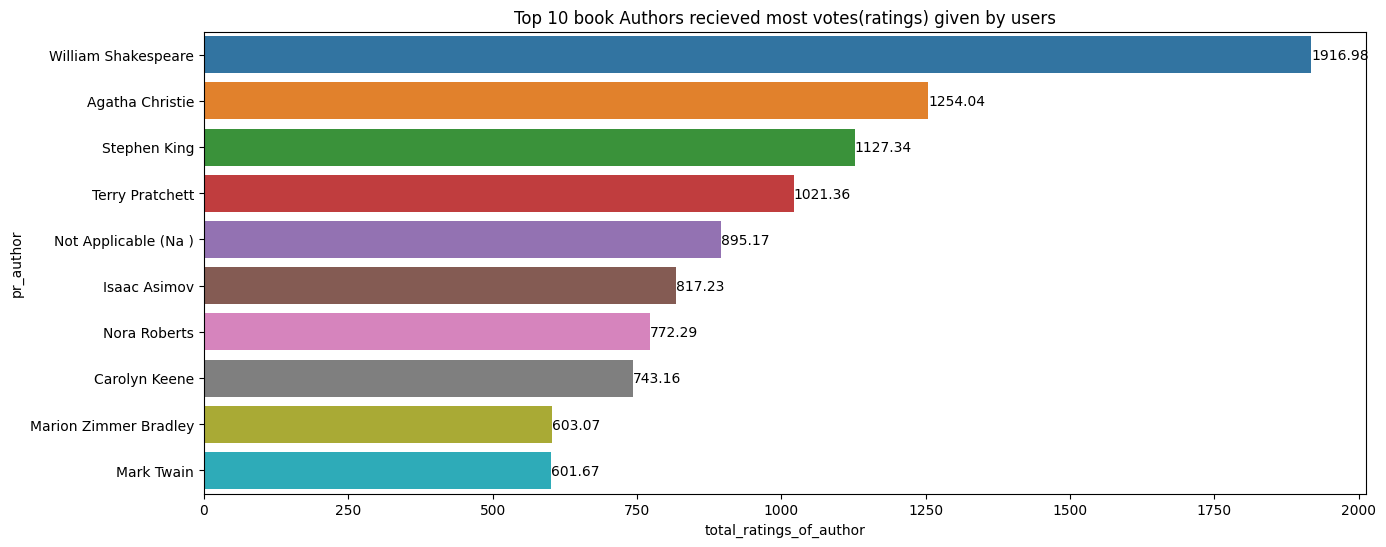

In [77]:
plt.figure(figsize=(15,6))
ax= sns.barplot(data = author_total_rating_df, x='total_ratings_of_author', y= 'pr_author')

for i in ax.patches :
  ax.text(i.get_width() + 0.05, i.get_y()+0.5, str(i.get_width()), fontsize= 10)

plt.title('Top 10 book Authors recieved most votes(ratings) given by users')
plt.show()

### So by above plot we see that book author name william Shakespeare has most number of book ratings, then followed by Agatha Christie, Stephan King and so on ....

# Now let us see top 10 Authors and there Book Counts.

In [78]:
author_books_df = authors_df.groupby('pr_author').agg(total_books_of_author = ('Book-Title', 'nunique')).reset_index()
author_books_df = author_books_df.sort_values(by ='total_books_of_author', ascending=False).head(10)

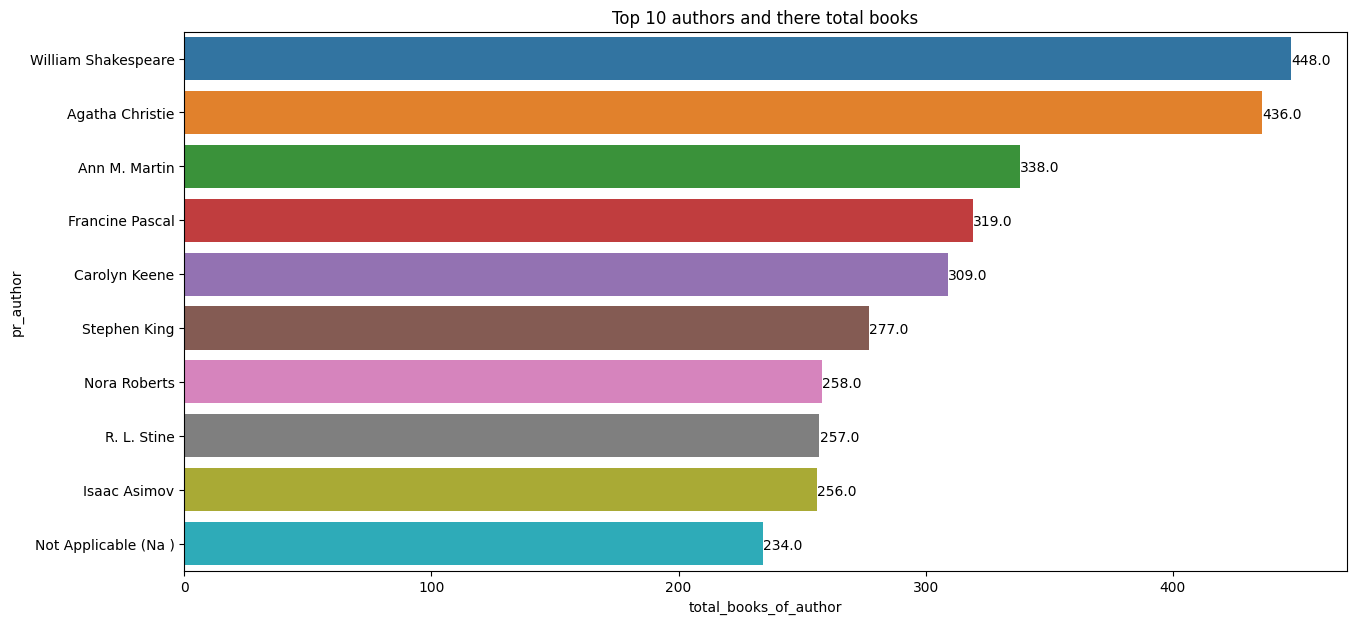

In [79]:
plt.figure(figsize=(15,7))
ax= sns.barplot(data= author_books_df, x='total_books_of_author', y='pr_author')

for i in ax.patches :
  ax.text(i.get_width() + 0.05,i.get_y()+0.5, str(i.get_width()), fontsize= 10 )
plt.title('Top 10 authors and there total books')
plt.show()

### As we see that by above plot book author william shakspher has most no of books, and then followed by Agatha Christie, and so on.... 

# creating dataframe of authors books and there book ratings counts

### by merging authors_total_rating_df and author_books_df

In [80]:
author_books_and_rating_df = pd.merge(author_total_rating_df, author_books_df, on='pr_author', how='outer')

# finding a avg ratings given by users to author

In [81]:
author_books_and_rating_df['avg_author_rating'] = np.round(author_books_and_rating_df['total_ratings_of_author'] / author_books_and_rating_df['total_books_of_author'],2)

In [82]:
author_books_and_rating_df = author_books_and_rating_df.sort_values(by='avg_author_rating',ascending=False)
author_books_and_rating_df

,pr_author,total_ratings_of_author,total_books_of_author,avg_author_rating
0,William Shakespeare,1916.98,448.0,4.28
2,Stephen King,1127.34,277.0,4.07
4,Not Applicable (Na ),895.17,234.0,3.83
5,Isaac Asimov,817.23,256.0,3.19
6,Nora Roberts,772.29,258.0,2.99
1,Agatha Christie,1254.04,436.0,2.88
7,Carolyn Keene,743.16,309.0,2.41
3,Terry Pratchett,1021.36,NaN,NaN
8,Marion Zimmer Bradley,603.07,NaN,NaN
9,Mark Twain,601.67,NaN,NaN


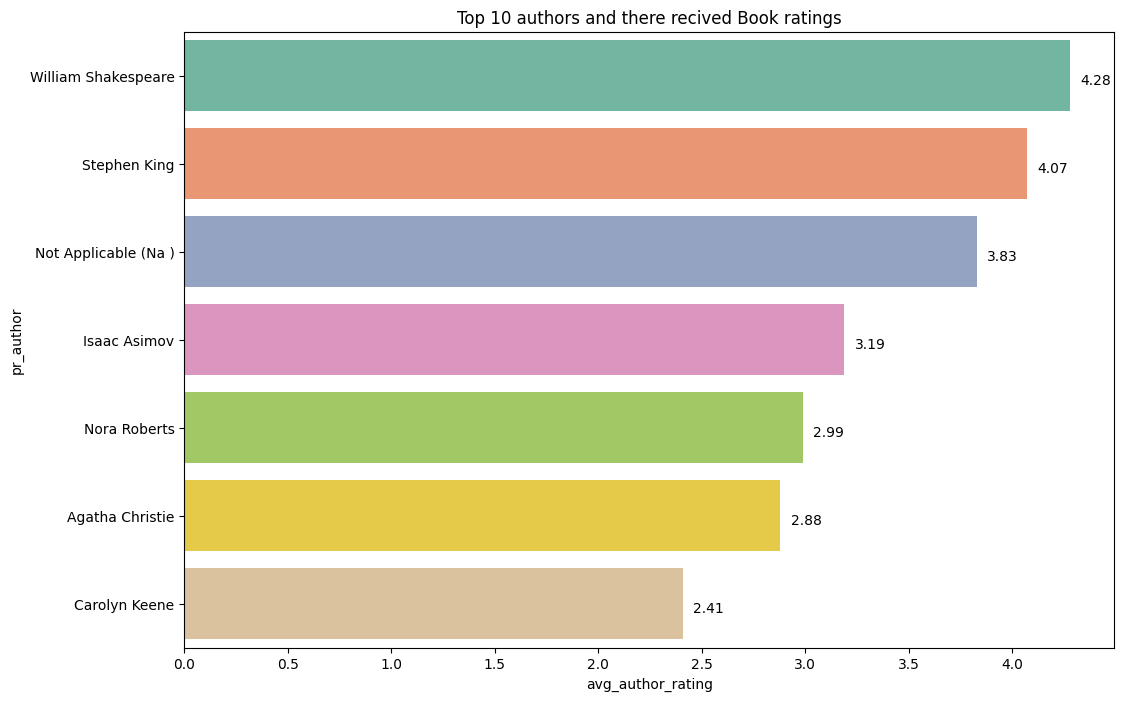

In [83]:
plt.figure(figsize= (12,8))
ax= sns.barplot(data= author_books_and_rating_df.head(7), x= 'avg_author_rating', y= 'pr_author', palette= 'Set2')

for i in ax.patches:
  ax.text(i.get_width()+ 0.05, i.get_y()+0.5, str(i.get_width()), fontsize=10)

plt.title('Top 10 authors and there recived Book ratings')
plt.show()

### So we see that Books of william shaksphere has got avg book ratings around 4 to 5. 
### then followed by stephan king, Isaac Asimov and so on ....

### Up till now we have explored the books , there authors, book ratings to authors, to books, and authors avg book rating.

### Now let us move one step ahead to build a recommender model.

### Finding weighted avg ratings of books for better analysis

# Weighted average rating method
### Weighted average is an important component in recommender systems, as it enables the system to provide more personalized and accurate recommendations to users.
### In the weighted average approach, we multiply each rating by a similarity factor(which tells how similar the users are).

### By multiplying with the similarity factor, we add weights to the ratings.

### The heavier the weight, the more the rating would matter.

###Using Weighted average for each Book’s Average Rating
 
## Formula =

#W = (Rv + Cm)/(v + m)

###where
 
### W= Weighted avg Book Rating

### R =  Average of the Book ratings

### v = No of people who have rated the books(number of votes)

### m = minimum no of votes to be listed or considered in calculation

### C = the mean rating across all the books

firstly creating dataframe of authors, book title, avg book rating, and there total book rating to that book.

In [84]:
total_votes = authors_df.drop_duplicates(subset= ['pr_author', 'Book-Title'], keep= 'first' )
total_votes.reset_index(inplace =True)

In [85]:
total_votes = total_votes[['pr_author', 'Book-Title', 'avg_book_rating', 'book_ratings_count']]

In [86]:
total_votes.head()

,pr_author,Book-Title,avg_book_rating,book_ratings_count
0,C. van Amerongen (translator),The Way Things Work: An Illustrated Encycloped...,8.0,1
1,Judith Kerr,Mog's Christmas,0.0,1
2,Helen Forrester,Twopence to Cross the Mersey,0.0,1
3,Muriel Spark,The Prime of Miss Jean Brodie,0.0,1
4,Jeffrey Archer,Matter Of Honour,0.0,1


### Now Assigning values in weighted avg method formula

In [87]:
C = total_votes['avg_book_rating'].mean()

In [88]:
m = total_votes['book_ratings_count'].quantile(0.9998)
m

213.98399999999674

So taking only those observation in calculations where book rating count is >= 213.

In [89]:
total_votes = total_votes[total_votes['book_ratings_count'] >= m]
total_votes.head()

,pr_author,Book-Title,avg_book_rating,book_ratings_count
4410,Rebecca Wells,The Divine Secrets of the Ya-Ya Sisterhood: A ...,3.30,269
5901,Rebecca Wells,Divine Secrets of the Ya-Ya Sisterhood: A Novel,3.17,509
5964,Barbara Kingsolver,The Poisonwood Bible: A Novel,3.31,321
6052,Ann Patchett,Bel Canto: A Novel,3.56,233
6144,Eric Schlosser,Fast Food Nation: The Dark Side of the All-Ame...,3.73,222


In [90]:
# Now calculating weighted avg book rating

def weighted_avg_rating(x, m=m, C=C) :
  v = x['book_ratings_count']
  R = x['avg_book_rating']
  return np.round(((R * v)+ (C * m))/ (v + m), 2)


In [91]:
# Applying function

total_votes['weighted_avg_rating'] = total_votes.apply(weighted_avg_rating, axis=1)

In [92]:
total_votes = total_votes.sort_values(by= 'weighted_avg_rating', ascending= False)
total_votes.head()

,pr_author,Book-Title,avg_book_rating,book_ratings_count,weighted_avg_rating
68476,J. K. Rowling,Harry Potter and the Order of the Phoenix (Boo...,5.80,280,4.51
99375,J. K. Rowling,Harry Potter and the Sorcerer's Stone (Harry P...,4.85,415,4.16
58146,Dan Brown,The Da Vinci Code,4.53,695,4.13
30879,Alice Sebold,The Lovely Bones: A Novel,4.24,920,3.97
133705,Mitch Albom,The Five People You Meet in Heaven,4.61,356,3.94


# Now finding Top 10 books which have high weightage as compare to others

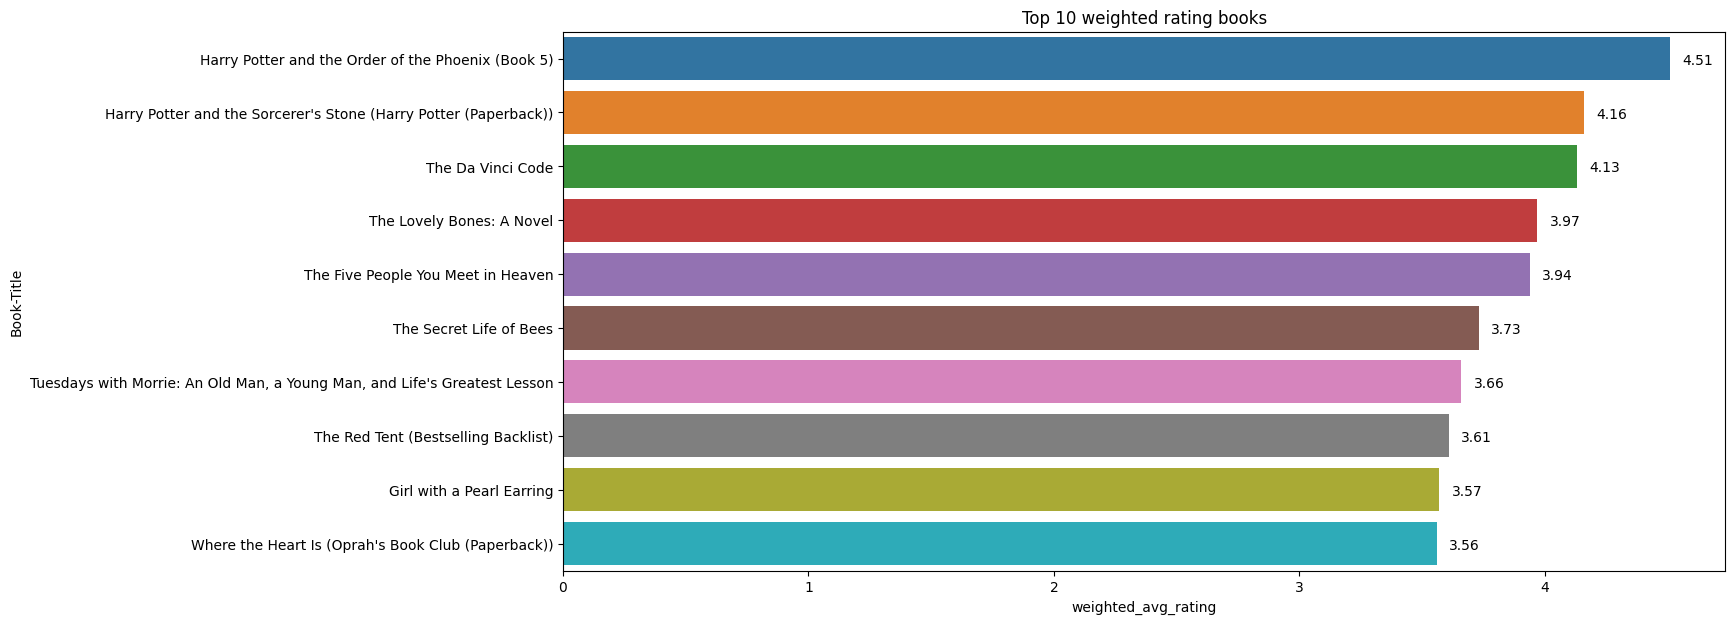

In [93]:
plt.figure(figsize= (15,7))
ax = sns.barplot(data = total_votes.head(10), x= 'weighted_avg_rating', y= 'Book-Title')

for i in ax.patches:
  ax.text(i.get_width()+0.05, i.get_y()+0.5, str(i.get_width()), fontsize= 10)

plt.title('Top 10 weighted rating books')
plt.show()

### We see that Harry potter's novel has high weightage rating as compare to others.
### So  we can give such types of books recommendation to other users.
### So any book of J K Rowling publishes then we give importance to those books and recommend them to users.

## So We have made a good visualization and obtained good inferences from EDA.

## Now its time to build a recommendation system

## Some types of  Recommendation system - 

1) Collaborative filtering

2) Content based filtering

3) Hybrid filtering

4) popularity based recommendation system.

# Here in Book Recommendation system we use colaborative filtering


# **Collaborative filtering**





### Collaborative filtering techniques create a model based on past users activity (items previously purchased, movies viewed and rated, etc.) as well as usage choices made by both current and past users. Then, this model is used to predict the ratings for items or items themselves that the user might be interested in.

# Item Based Recommendation Model

Let us create since in our avg Book rating column there are some ratings which are in decimal form. so for better understanding let us create a new column named as rating between. 

In [94]:
authors_df.head() 

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,book_ratings_count,avg_book_rating,pr_author
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,1,8.0,C. van Amerongen (translator)
1,0001010565,Mog's Christmas,Judith Kerr,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,1,0.0,Judith Kerr
2,0001046713,Twopence to Cross the Mersey,Helen Forrester,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,1,0.0,Helen Forrester
3,0001046934,The Prime of Miss Jean Brodie,Muriel Spark,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,1,0.0,Muriel Spark
4,0001047663,Matter Of Honour,Jeffrey Archer,Trafalgar Square Books,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,1,0.0,Jeffrey Archer


In [95]:
authors_df.loc[(authors_df['avg_book_rating'] >=0) & (authors_df['avg_book_rating'] <= 1), 'book_rating_between'] = 'between_0_to_1'
authors_df.loc[(authors_df['avg_book_rating'] >= 1) & (authors_df['avg_book_rating'] <= 2), 'book_rating_between'] = 'between_1_to_2'
authors_df.loc[(authors_df['avg_book_rating'] >= 2) & (authors_df['avg_book_rating'] <= 3), 'book_rating_between'] = 'between_2_to_3'
authors_df.loc[(authors_df['avg_book_rating'] >= 3) & (authors_df['avg_book_rating'] <= 4), 'book_rating_between'] = 'between_3_to_4'
authors_df.loc[(authors_df['avg_book_rating'] >= 4) & (authors_df['avg_book_rating'] <= 5), 'book_rating_between'] = 'between_4_to_5'
authors_df.loc[(authors_df['avg_book_rating'] >= 5) & (authors_df['avg_book_rating'] <= 6), 'book_rating_between'] = 'between_5_to_6'
authors_df.loc[(authors_df['avg_book_rating'] >= 6) & (authors_df['avg_book_rating'] <= 7), 'book_rating_between'] = 'between_6_to_7'
authors_df.loc[(authors_df['avg_book_rating'] >= 7) & (authors_df['avg_book_rating'] <= 8), 'book_rating_between'] = 'between_7_to_8'
authors_df.loc[(authors_df['avg_book_rating'] >= 8) & (authors_df['avg_book_rating'] <= 9), 'book_rating_between'] = 'between_8_to_9'
authors_df.loc[(authors_df['avg_book_rating'] >= 9) & (authors_df['avg_book_rating'] <= 10), 'book_rating_between'] = 'between_9_to_10'

In [96]:
authors_df.head()

,ISBN,Book-Title,Book-Author,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,book_ratings_count,avg_book_rating,pr_author,book_rating_between
0,0000913154,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,1,8.0,C. van Amerongen (translator),between_8_to_9
1,0001010565,Mog's Christmas,Judith Kerr,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,1,0.0,Judith Kerr,between_0_to_1
2,0001046713,Twopence to Cross the Mersey,Helen Forrester,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,1,0.0,Helen Forrester,between_0_to_1
3,0001046934,The Prime of Miss Jean Brodie,Muriel Spark,Trafalgar Square Publishing,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,http://images.amazon.com/images/P/0001046934.0...,1,0.0,Muriel Spark,between_0_to_1
4,0001047663,Matter Of Honour,Jeffrey Archer,Trafalgar Square Books,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,http://images.amazon.com/images/P/0001047663.0...,1,0.0,Jeffrey Archer,between_0_to_1


### Now this is dataframe and in top of this we will build a recommender engine

In [103]:
# Let us create a dataframe of only 'avg book rating' and 'rating count'
trial_df = authors_df[['avg_book_rating', 'book_ratings_count']]

###  creating array of book rating and there rating count of trial dataframe

In [107]:
model_data = np.asarray([np.asarray(trial_df['avg_book_rating']), np.asarray(trial_df['book_ratings_count'])]).T        # transpose the array i.e row to column and vice versa

In [108]:
model_data

array([[8., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

# Implementing K means  algorithm

### Collaborative Filtering Using k-Nearest Neighbors (kNN) 
### kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors.

In [109]:
from sklearn.cluster import KMeans

# by using elbow method 
score = []
x = model_data() 
for cluster in 

Now since year of publication feature is actually numerical datatype. 

## So performing feature engineering on year of publication column.

 changing dtype of year of publication

In [ ]:
book_df['Year-Of-Publication'] =book_df['Year-Of-Publication'].astype(int)

In [ ]:
book_df['Year-Of-Publication'].value_counts()

2002    17626
1999    17431
2001    17358
2000    17232
1998    15766
        ...  
1910        1
1934        1
1914        1
1904        1
2037        1
Name: Year-Of-Publication, Length: 116, dtype: int64

<Axes: xlabel='Year-Of-Publication', ylabel='Density'>

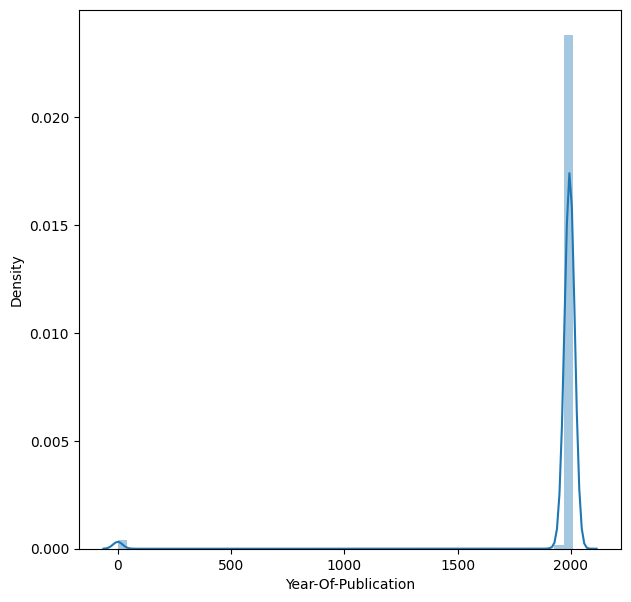

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(book_df['Year-Of-Publication'])

<Axes: xlabel='Year-Of-Publication'>

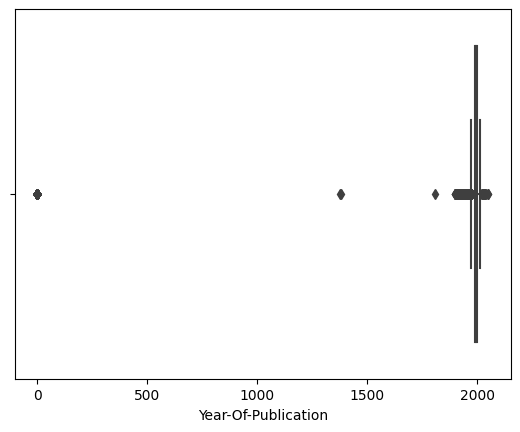

In [ ]:
sns.boxplot(x='Year-Of-Publication', data= book_df)

As we see that most of the Book data is present between 1800 to 2023 years.

and there are some outliers also present. i.e. there are some book publications year date mentioned in dataset as 2037, 2024, 2030 etc which are future years publications years so we dont know whether these books will be published or not so we will fill them by nan values and then replace these observations by there median. 

We taking only year of publications data from 0 years to present year i.e. 2023 and other years data filling with nan 

In [ ]:
book_df.loc[(book_df['Year-Of-Publication'] > 2023) | (book_df['Year-Of-Publication']==0), 'Year-Of-Publication']= np.nan

In [ ]:
book_df['Year-Of-Publication'].describe()

count    266723.000000
mean       1993.687770
std           8.321219
min        1376.000000
25%        1989.000000
50%        1996.000000
75%        2000.000000
max        2021.000000
Name: Year-Of-Publication, dtype: float64

In [ ]:
# so replacing null values by median for year of publication column 
print('missing values in year of publications before imputing ', book_df['Year-Of-Publication'].isnull().sum())
book_df['Year-Of-Publication'].fillna(int(book_df['Year-Of-Publication'].median()), inplace=True)
print('missing values in year of publication after imputing ', book_df['Year-Of-Publication'].isnull().sum())

missing values in year of publications before imputing  4631
missing values in year of publication after imputing  0


In [ ]:
book_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

## Now looking for other features of book dataset 

In [ ]:
# checking value counts of book author
book_df['Book-Author'].value_counts()

Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: Book-Author, Length: 102020, dtype: int64

So we see that in our book dataset we have writer name as Agatha Christie has most number of books as 632 number of books, and then followed by author William Shakespeare has 567 value counts of books 

In [ ]:
book_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


Droping Image-URL columns bcoz these are visited urls of users, it changes with user, so we will drop them for simplicity.

In [ ]:
book_df.drop(columns=['Image-URL-S',	'Image-URL-M','Image-URL-L'], inplace=True)

In [ ]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271354 non-null  object 
 1   Book-Title           271354 non-null  object 
 2   Book-Author          271354 non-null  object 
 3   Year-Of-Publication  271354 non-null  float64
 4   Publisher            271354 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.4+ MB


So we have cleaned our book dataset 

Now its time to look for Ratings dataset

# 3) Ratings Dataset

# Preprocessing the Ratings data

In [ ]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
ratings_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

Since in ratings data no any missing observations presents

Checking unique user id and ISBN values

In [ ]:
print('number of users with unique user id ', ratings_df['User-ID'].nunique())
print('\n')
print('number of unique book ISBN value ', ratings_df['ISBN'].nunique())

number of users with unique user id  105283


number of unique book ISBN value  340556


So from above we see that many users are buying multiple books. 

Also some books are really famous and hence these books are bought by multiple users. 

Since as we see that ISBN column are common in both ratings data and books dataframe.

so lets create a new ratings dataframe on the basis of ISBN value common in ratings and book dataset.

In [ ]:
# making all the ISBN no. uppercase
ratings_df['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

### lets see if all the books in rating_df are also in books_df

 



In [ ]:
ratings_df_new = ratings_df[ratings_df['ISBN'].isin(book_df['ISBN'])]

In [ ]:
print('ratings datframe shape ',ratings_df.shape)
print('ratings datframe which are having common ISBN value betwn Book dataframe ', ratings_df_new.shape)

ratings datframe shape  (1149780, 3)
ratings datframe which are having common ISBN value betwn Book dataframe  (1031129, 3)


In [ ]:
# Value counts of book ratings

ratings_df_new['Book-Rating'].value_counts().reset_index()

,index,Book-Rating
0,0,647291
1,8,91803
2,10,71225
3,7,66401
4,9,60776
5,5,45355
6,6,31687
7,4,7617
8,3,5118
9,2,2375


As we see that 0 as implicit ratings (does not clearly described or ratings count) and it has value counts as 647291 number of total book rarings given by users.

And we say explicit ratings as which is not 0.user given 8 as rating to book has  91803 nuber of books ratings. 

i.e. We can see for explicit ratings that rating 8 is received by most number of books followed by rating 10

## Finding popular book based on ratings

Checking Top 20 books which recived highest ratings count.

In [ ]:
ratings_df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by= 'Book-Rating', ascending= False)[:20]

,ISBN,Book-Rating
215950,0971880107,2502
38570,0316666343,1295
70798,0385504209,883
7344,0060928336,732
32370,0312195516,723
87397,044023722X,647
21342,0142001740,615
145042,067976402X,614
133142,0671027360,586
93847,0446672211,585


As we see that 215950 users has given highest number of book ratings (i.e. 2502) for book ISBN number - 0971880107

But here we have both combined explicit and implicit ratings

So we have to separate explicit and implicit ratings of books.

Creatings separate dataframe for Explicit and implicit ratings based on book ratings given by users.

In [ ]:
explicit_rating = ratings_df_new[ratings_df_new['Book-Rating'] != 0]
implicit_rating = ratings_df_new[ratings_df_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383838, 3) and implicit rating: (647291, 3)


In [ ]:
explicit_ratings = ratings_df_new[ratings_df_new['Book-Rating'] !=0]

implicit_ratings = ratings_df_new[ratings_df_new['Book-Rating'] ==0]

In [ ]:
explicit_ratings.head()

,User-ID,ISBN,Book-Rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [ ]:
implicit_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
10,276746,0425115801,0
11,276746,0449006522,0


In [ ]:
print('shape of explicit ratings ', explicit_ratings.shape, '\n', 'shape of implict ratings ', implicit_ratings.shape)

shape of explicit ratings  (383838, 3) 
 shape of implict ratings  (647291, 3)


We see that most of the observation in our rating dataset have implicit ratings
(0) for books. 

## Now che checking top 20 most popular explicitly rated books

In [ ]:
explicit_ratings.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending= False)[:20]

,ISBN,Book-Rating
21945,0316666343,707
117744,0971880107,581
38819,0385504209,487
18058,0312195516,383
4131,0060928336,320
68898,059035342X,313
12325,0142001740,307
51799,0446672211,295
47986,044023722X,281
57625,0452282152,278


## Gettings Book names of these top 5 most popular rated books by ther ISBN number from our book dataframe.

In [ ]:
ISBN_numbers = ['0316666343', '0971880107','0385504209	', '0312195516','0060928336']
book_df[book_df['ISBN'].isin(ISBN_numbers)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
26,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
408,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
522,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


So 21945 Users have given Most explicit ratings (707 number of book ratings) counts for book title = The Lovely Bones: A Novel which has ISBN number 0316666343, which is written by Alice Sebold published in 2002.

Thus we say that The Lovely Bones: A Novel is most popular book as based on ratings.

So up till now we have analysed and cleaned our three datasets.

### Now we will merge them for further exploration and building recommendation of books model. 

# Merging Datasets

Note here we only taking Explicit ratings datframe bcoz implicit ratings datfame will not give any information, regarding explore and bulid model...

Since ISBN named column is same in both book and explicit ratigs datset so joining them from inner side.

In [ ]:
explicit_ratings.shape

(383838, 3)

In [ ]:
df_of_book_and_ratings = pd.merge(book_df, explicit_ratings, on='ISBN', how= 'inner')

In [ ]:
df_of_book_and_ratings.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,123629,9


Now Merging df_of_book_and_ratings with users dataframe.

Since User_ID is common column between them so joining them on inner side. 

In [ ]:
final_df = pd.merge(df_of_book_and_ratings,user_df, on='User-ID', how='inner')

In [ ]:
final_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,34.746638,youth,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8,5,34.746638,youth,CANADA
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8,5,34.746638,youth,CANADA
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8,5,34.746638,youth,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8,6,34.746638,youth,CANADA


So this is our final datframe for further exploration.

In [ ]:
final_df.shape

(383838, 10)

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383838 entries, 0 to 383837
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 383838 non-null  object 
 1   Book-Title           383838 non-null  object 
 2   Book-Author          383838 non-null  object 
 3   Year-Of-Publication  383838 non-null  float64
 4   Publisher            383838 non-null  object 
 5   User-ID              383838 non-null  int64  
 6   Book-Rating          383838 non-null  int64  
 7   Age                  383838 non-null  float64
 8   Age_group            383838 non-null  object 
 9   Country              383838 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 32.2+ MB


So now we have 383838 number of observations and 10 features to use for further building project.

# Now Doing Some EDA on Final Dataframe.

## lets check Frequently ratings given by users

Text(0.5, 1.0, 'most popular ratings given by users')

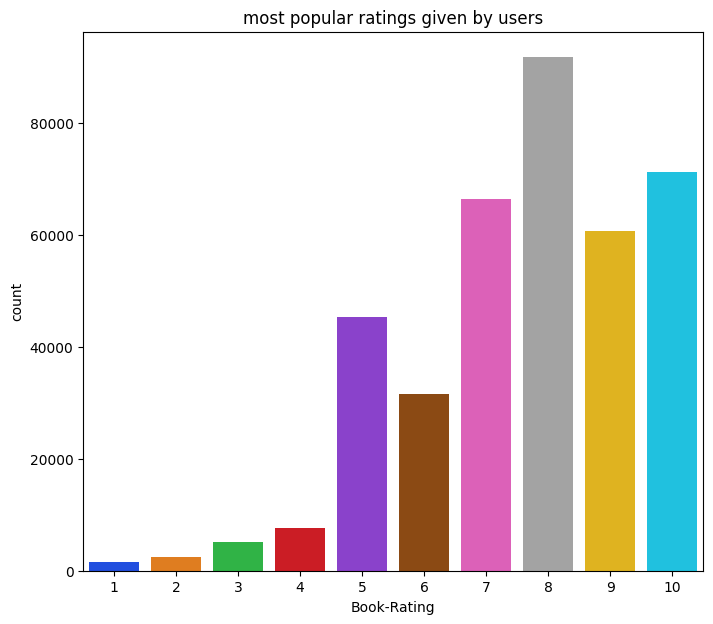

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(data=final_df, x='Book-Rating', palette='bright')
plt.title('most popular ratings given by users')

As we see that Most of the users given rating = 8 for books 

And most of the user in our dataset has given ratings between  4 to 10.

## Checking Top 10 popular books based on ratings

Text(0.5, 1.0, 'top 10 most popular books based on ratings')

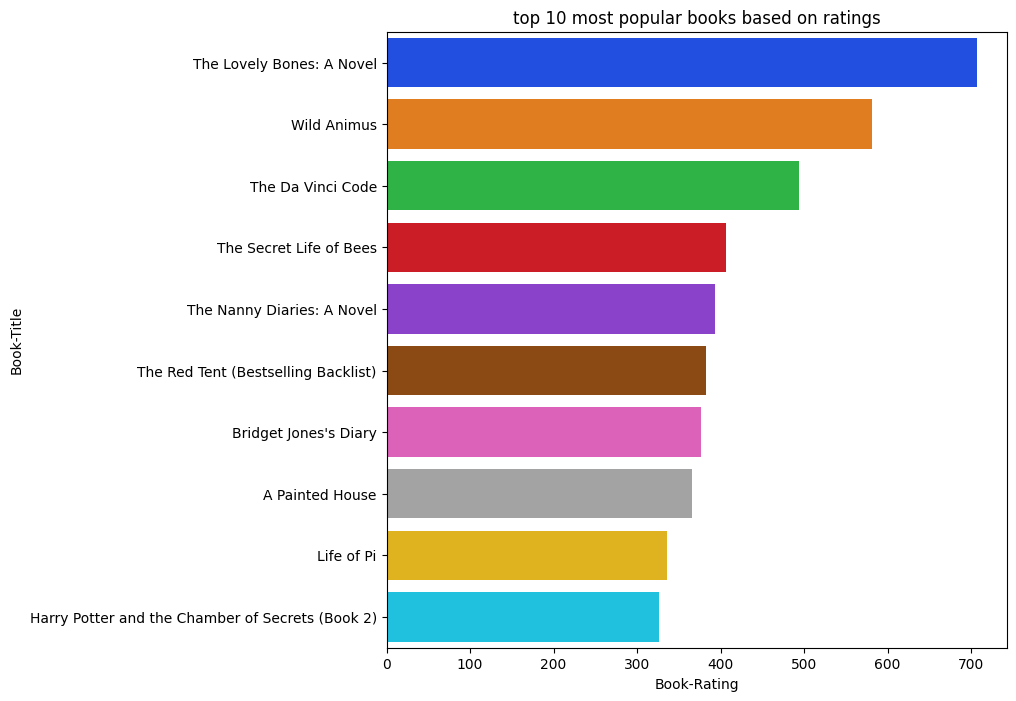

In [ ]:
# creating dataframe for book title and book ratings
popular_books_df = final_df.groupby('Book-Title')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

plt.figure(figsize=(8,8))
sns.barplot(data= popular_books_df, y= 'Book-Title', x= 'Book-Rating', palette = 'bright')
plt.title('top 10 most popular books based on ratings')

As We have already  seen that  book which has been rated by most number of users is  'The Lovely Bones'

## Now Finding most popular book author

<Axes: title={'center': 'top 10 popular book authors based on ratings count'}, xlabel='Book-Rating', ylabel='Book-Author'>

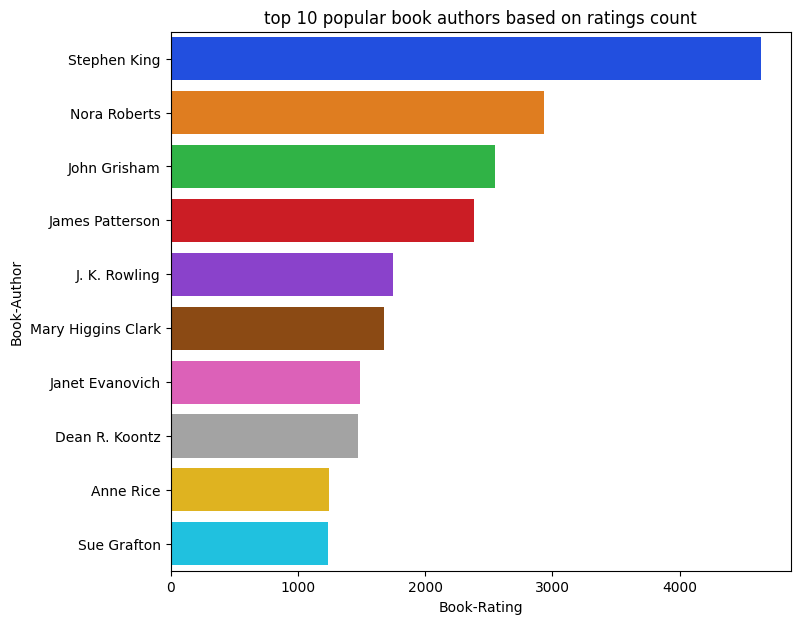

In [ ]:
# creating dataframe of book author and book ratings
book_author = final_df.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending = False)[:10]

plt.figure(figsize=(8,7))
plt.title('top 10 popular book authors based on ratings count')
sns.barplot(data= book_author, y='Book-Author', x= 'Book-Rating', palette='bright')


Book author - Stephan King has 4639 number of book ratings given by 55493 users.

And then followed by Nora roberts which have 2938 number of book ratings.

## Checking Publisher with most books published

Text(0.5, 0, 'number of books published')

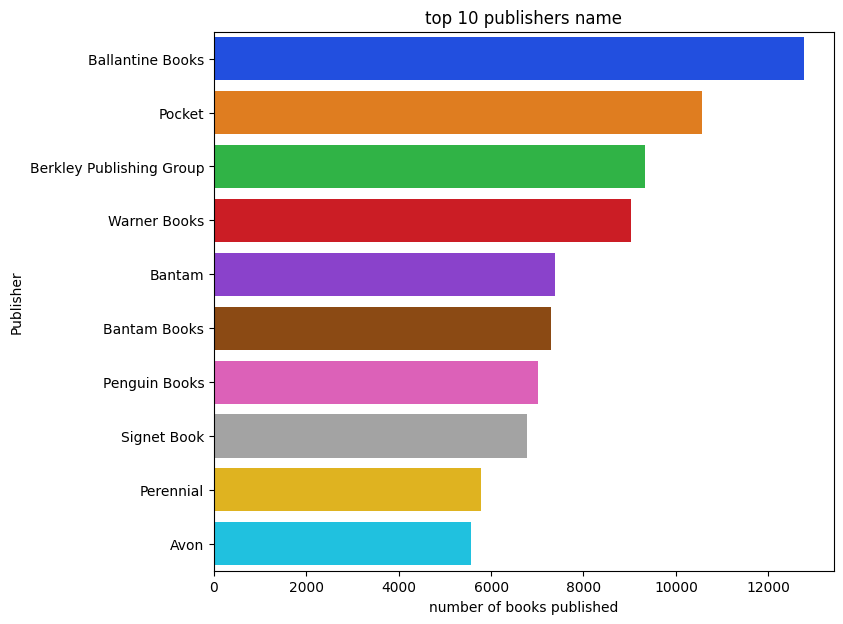

In [ ]:
# grouping publishers feature with number of book-titles in dataframe
publishers_books_counts = final_df.groupby('Publisher')['Book-Title'].count().reset_index().sort_values(by= 'Book-Title', ascending=False)[:10]

plt.figure(figsize=(8,7))
sns.barplot(data=publishers_books_counts, y= 'Publisher', x='Book-Title', palette='bright')
plt.title('top 10 publishers name')
plt.xlabel('number of books published')

Ballantine Books	publishing company has 12781 number of books published.

Then Pocket	publishing company has 10567 number of books published.

## Now Checking Which country has most readers

In [ ]:
final_df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,34.746638,youth,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8,5,34.746638,youth,CANADA


Text(0.5, 0, 'number of users')

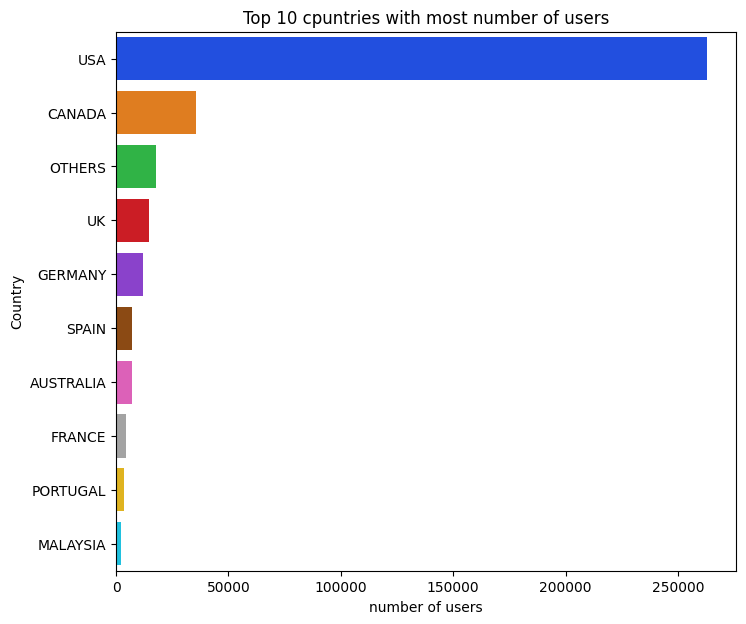

In [ ]:
# grouping countries and there number of users
country_users = final_df.groupby('Country')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending= False)[:10]

plt.figure(figsize=(8,7))

sns.barplot(data=country_users, y='Country', x= 'User-ID', palette='bright')
plt.title('Top 10 cpuntries with most number of users')
plt.xlabel('number of users')


USA has most number of readers which has almost 262671 users count in our data.

Then CANADA has 35574 number of readers.

In [ ]:
final_df['Age_group'].value_counts()

youth     232591
adults    113328
olds       21918
teens      14588
childs      1413
Name: Age_group, dtype: int64

## Checking Books preferance based on users Age, and Book ratings

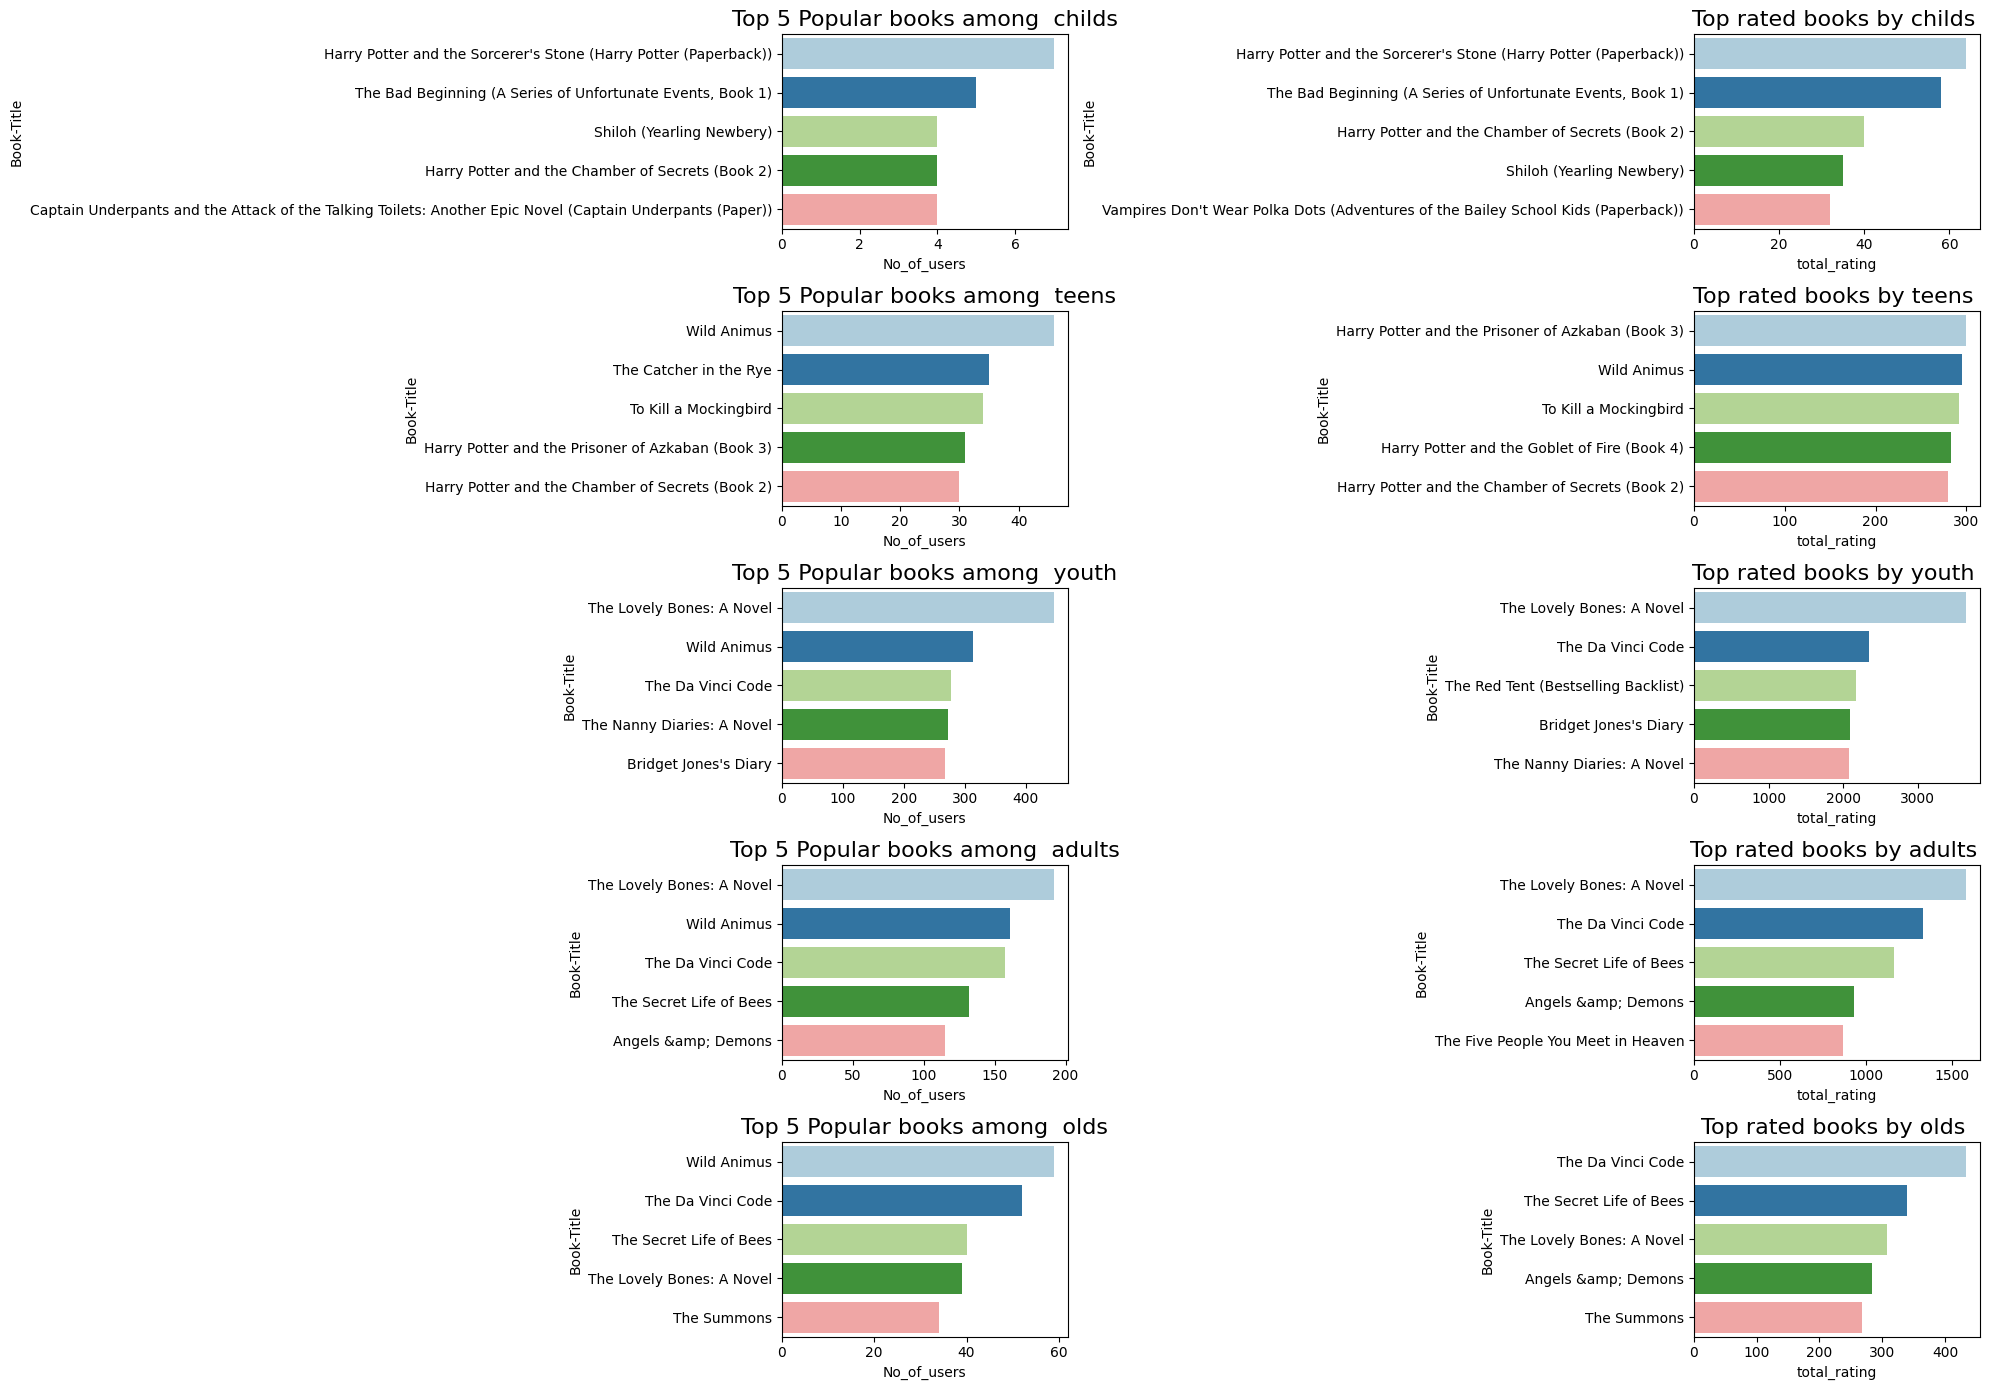

In [ ]:
fig=plt.figure(figsize=(20,14))
n=1
for group  in ['childs','teens','youth','adults','olds']:
  age_df=final_df.loc[final_df['Age_group']==group].groupby(['Book-Title']).agg(No_of_users=('User-ID','nunique'),total_rating=('Book-Rating','sum')).reset_index() 
  plt.subplot(5,2,n)
  age_df.sort_values(by='No_of_users',ascending=False,inplace=True)

  sns.barplot(data=age_df.head(5), x='No_of_users',y='Book-Title',palette='Paired')

  plt.title('Top 5 Popular books among  {}'.format(group),size=16)
  n+=1

  plt.subplot(5,2,n)
  age_df.sort_values(by='total_rating',ascending=False,inplace=True)

  sns.barplot(data=age_df.head(5), x='total_rating', y='Book-Title', palette='Paired')
  plt.title('Top rated books by {} '.format(group),size=16)
  n+=1
  
plt.tight_layout()

Up till now we have done quite good exploration of our dataset. And we have made good plots of observations and from them also we have made some important results.

1) In Childrens age group( age<=13) there are less number users but among them a most popular book is 'Harry Potter and the scorcers stones(harry potter(paperback)).And it also has above 60 number of book ratings recieved. i.e. we can suggest Novels related to this Books for childrens.

2) In teenagers book readers, and among them 50 users prefers to read 'Wild Animus' Book and it has total ratings around 300 times.

3) In Youths (ages 18 to 35) readers mostly reads "The Lovely Bones: A novel",
and It has around 4000 total ratings. we can suggest these types of novels for youths and Teenagers groups. 

4) In adults( ages 35 to 55) also reads The Lovely Bones Novel and they also gives around 1500 plus book ratings for this book.

5) In olds (Age above 55) most of the readers reads Wild Animus book But they hardly give any ratings for this book. Thus this age group also reads The Da Vinci Code book and they gives around 400 plus book ratings for this book.

## Up till Now We have succesfully covered EDA part of our dataset.

## Now we move forward to build a recommender model to suggest books for users based on historical data.

# Popularity Based Recommender System

It is a type of recommendation system which works on the principle of popularity and or anything which is in trend.

## Most popular Recommendations

### based on Book ratings

Defining function

In [ ]:
def most_popular_recom(final_df, n):
  if n>=1 and n<=len(final_df):
    popular_books_df = final_df.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending= False).head(n)    # grouping Books ISBN codes with number of book ratings recieved
    
    return pd.merge(popular_books_df, book_df, on='ISBN')


In [ ]:
most_popular_recom(final_df,5)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,707,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,581,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,487,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,383,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,320,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


As we have seen That The Lovely Bones : A Novel is most popular books and it has overall 707 numnber of book ratings recieved. 

Then Wild Animus, The Da Vinci Code books also second and third most popular books among other books in our dataset resp.

## Analysing Country Based Book Recommendations 

Defining function for getting country wise most popular Books 

In [ ]:
def country_popular_books(final_df, country) :
  if country in list(final_df['Country'].unique()):
    return most_popular_recom(final_df[final_df['Country']==country], 5)  # calling "most popular recom" function to return top 5 popular recomendations of books based on book ratings

In [ ]:
country_popular_books(final_df, 'USA')                 ## we can see any country we want to look for top 5 book recomendations

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,532,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0385504209,393,The Da Vinci Code,Dan Brown,2003.0,Doubleday
2,0312195516,302,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
3,0971880107,300,Wild Animus,Rich Shapero,2004.0,Too Far
4,0142001740,271,The Secret Life of Bees,Sue Monk Kidd,2003.0,Penguin Books


## **Weighted average rating method**

In the weighted average approach, we multiply each rating by a similarity factor(which tells how similar the users are). 

By multiplying with the similarity factor, we add weights to the ratings. 

The heavier the weight, the more the rating would matter.

Using Weighted average for each Book’s Average Rating

Formula = 

**W = (Rv + Cm)/(v + m)**

where

W= Weighted Rating

R = Average of the Books rating 

v = No of people who have rated the books(number of votes)

m = minimum no of votes to be listed

C = the mean rating across all the books

Now finding values 

In [ ]:
#finding the average rating and number of users who have given ratings (no of votes) received by books
relevant_data_for_weighted_avg  = final_df.groupby(['Book-Title','Book-Author'],as_index=False).agg(avg_book_rating=('Book-Rating','mean'),ratings_recieved=('Book-Rating','count'))
v = relevant_data_for_weighted_avg['ratings_recieved']
R = relevant_data_for_weighted_avg['avg_book_rating']
C = relevant_data_for_weighted_avg['avg_book_rating'].mean()
m = int(relevant_data_for_weighted_avg['ratings_recieved'].quantile(0.90)) #minimum number of votes to be listed
print(f'The average rating of all the books is {C} and \n The minimum number of votes required by the books to be recomended is {m}  ')

The average rating of all the books is 7.521907032230356 and 
 The minimum number of votes required by the books to be recomended is 4  


In [ ]:
#Calculating weighted average rating of the books
# Creating column for weighted avg book ratings
relevant_data_for_weighted_avg['weighted_avg_book_ratings (W)']=round(((R*v)+ (C*m))/(v+m),2)

In [ ]:
relevant_data_for_weighted_avg.sort_values(by='weighted_avg_book_ratings (W)', ascending=False).head(7)

,Book-Title,Book-Author,avg_book_rating,ratings_recieved,weighted_avg_book_ratings (W)
46705,Harry Potter and the Chamber of Secrets Postca...,J. K. Rowling,9.869565,23,9.52
122685,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,9.653846,52,9.50
30275,Dilbert: A Book of Postcards,Scott Adams,9.923077,13,9.36
82107,Postmarked Yesteryear: 30 Rare Holiday Postcards,Pamela E. Apkarian-Russell,10.000000,11,9.34
118637,"The Return of the King (The Lord of the Rings,...",J.R.R. TOLKIEN,9.402597,77,9.31
17798,Calvin and Hobbes,Bill Watterson,9.583333,24,9.29
101316,The Authoritative Calvin and Hobbes (Calvin an...,Bill Watterson,9.600000,20,9.25


Thus above Dataframe gives most popalar book titles and there authors based on weihted avg book ratings given by users.

Book title "Harry Potter and the Chamber of Secrets Postcard" is most popular book among users. And we can suggest simmilar types of novel books to users.

## Now We can also recommend books based on Book Authors

In [ ]:
relevant_data_for_weighted_avg['Book-Title'][50]

"'Tis Herself : A Memoir"

In [ ]:
def book_author(book_title,number,relevant_data_for_weighted_avg=relevant_data_for_weighted_avg):
  '''
  To recommend books from the same author as the book entered by the user
  '''
  book_author=relevant_data_for_weighted_avg.loc[relevant_data_for_weighted_avg['Book-Title']==book_title]['Book-Author'].unique()[0]
  author_df=relevant_data_for_weighted_avg.loc[(relevant_data_for_weighted_avg['Book-Author']==book_author)].reset_index().sort_values(by='weighted_avg_book_ratings (W)',ascending=False)
  print(f'The author of the book {book_title} is {book_author}\n')
  print(f'Here are the top {number} books from the same author\n')
  top_rec_books = author_df.loc[(author_df['Book-Title']!=book_title),['Book-Title','weighted_avg_book_ratings (W)']].head(number)
  return(top_rec_books)

In [ ]:
book_author('Harry Potter and the Chamber of Secrets (Book 2)', 5)

The author of the book Harry Potter and the Chamber of Secrets (Book 2) is J. K. Rowling

Here are the top 5 books from the same author



,Book-Title,weighted_avg_book_ratings (W)
23,Harry Potter and the Chamber of Secrets Postca...,9.52
26,Harry Potter and the Goblet of Fire (Book 4),9.10
40,Harry Potter and the Sorcerer's Stone (Book 1),9.03
35,Harry Potter and the Prisoner of Azkaban (Book 3),9.02
30,Harry Potter and the Order of the Phoenix (Boo...,9.02


Books of same author is recommended based on weighted avg rating.

That is if user search for Harry Potter and the Chamber of Secrets (Book 2) then we can recommend above 5 books to  the user remains engage on our platform.

### since we have obtained some great results from popularity based recommendation system.
###  Now we move ahead for another type of recommender system


# **Collaborative filtering**





### Collaborative filtering techniques create a model based on past users activity (items previously purchased, movies viewed and rated, etc.) as well as usage choices made by both current and past users. Then, this model is used to predict the ratings for items or items themselves that the user might be interested in.

### There are two main approaches to collaborative filtering: user-based and item-based.

# **Memory Based Approach**

### Memory-based techniques use the data (likes, votes, clicks, etc) that you have to establish correlations (similarities?) between either users (Collaborative Filtering) or items (Content-Based Recommendation) to recommend an item i to a user u who's never seen it before

### **KNN Based Algorithm**

### Collaborative Filtering Using k-Nearest Neighbors (kNN) kNN is a machine learning algorithm to find clusters of similar users based on common book ratings, and make predictions using the average rating of top-k nearest neighbors.

Since we have quite large dataset so performing clustering technique will be tedius things. 

So we will consider only those data which have some impact on our recommendation system.

Considering only those users which have given greater than 4 ratings to books and also considers top 10 %  of frequently rated books 

In [ ]:
minimum_ratings = 3

users = final_df['User-ID'].value_counts()
users_list = users[users > minimum_ratings].index.to_list()
imp_df = final_df[final_df['User-ID'].isin(users_list)]

print('Number of users with ratings more than 4 having shape as ',  imp_df.shape)

Number of users with ratings more than 4 having shape as  (313542, 10)


In [ ]:
imp_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,34.746638,youth,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8,5,34.746638,youth,CANADA
2,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8,5,34.746638,youth,CANADA
3,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8,5,34.746638,youth,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8,6,34.746638,youth,CANADA


In [ ]:
# top 10 % data of most frequently rated books

top_data_we_want = len(imp_df['ISBN'].unique()) * 0.1

users_list = imp_df['Book-Title'].value_counts().head(int(top_data_we_want)).index.to_list()
imp_df = imp_df[imp_df['Book-Title'].isin(users_list)]

print('Number of top 10% users dataframe shape is: {}'.format(imp_df.shape))

Number of top 10% users dataframe shape is: (167492, 10)


In [ ]:
imp_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,Age_group,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8,5,34.746638,youth,CANADA
7,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11676,8,34.746638,youth,OTHERS
8,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,11676,9,34.746638,youth,OTHERS
10,0440234743,The Testament,John Grisham,1999.0,Dell,11676,9,34.746638,youth,OTHERS
11,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994.0,Plume,11676,8,34.746638,youth,OTHERS


So this is our important dataset and on the basis of this we will build recommender system.

## Now Creating pivot table for users and Book title on there book ratings

In [ ]:
user_books_table =  imp_df.pivot_table(columns='User-ID', index='Book-Title', values='Book-Rating' )

In [ ]:
user_books_table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Q-Space (Star Trek The Next Generation, Book 47)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!Yo!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
one hundred years of solitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### There are lot of NaN values, and these NaN values shows User does not rated that perticular book

### Let replacing these NaN values by 0 ratings

In [ ]:
user_books_table.fillna(0, inplace=True)

user_books_table

User-ID,8,17,53,99,114,183,232,242,243,244,...,278633,278637,278648,278663,278668,278694,278773,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Q-Space (Star Trek The Next Generation, Book 47)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
!Yo!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
murder@maggody.com : An Arly Hanks Mystery (Arly Hanks Mysteries (Paperback)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
one hundred years of solitude,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Since most of values in user_books  pivot table are 0 

#### So converting table into sparse matrix format.

In [ ]:
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(user_books_table)

In [ ]:
sparse_matrix           ## Stored all user books ratings values in sparse matrix 

<13418x14960 sparse matrix of type '<class 'numpy.float64'>'
	with 166621 stored elements in Compressed Sparse Row format>

### Now implementing KNN agorithm

#### Using Brute Force algorithm

#### A brute force algorithm solves a problem through exhaustion: it goes through all possible choices until a solution is found. The time complexity of a brute force algorithm is often proportional to the input size. Brute force algorithms are simple and consistent, but very slow.

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn_model = NearestNeighbors(algorithm='brute')

knn_model.fit(sparse_matrix)

NearestNeighbors(algorithm='brute')

## creating recommendation function using knn model

In [ ]:
def get_recommendations_for_books(name, n):
    # getting book id
    book_id = user_books_table.index.get_loc(name)

    # distances and suggestions based on similarity
    distances, suggestions = knn_model.kneighbors(user_books_table.iloc[book_id, :].values.reshape(1,-1), n_neighbors=n+1)
    suggestions = suggestions.flatten()[1:] # exclude the first suggestion which is the input book itself
    recommended_books = user_books_table.iloc[suggestions].index.tolist()

    print(f"The top {n} recommended books for {name} are:", '\n')
    for book in recommended_books:
        print(book)

In [ ]:
get_recommendations_for_books('Harry Potter and the Chamber of Secrets (Book 2)', 10)

The top 10 recommended books for Harry Potter and the Chamber of Secrets (Book 2) are: 

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)
The Second Generation
Lover Beware
Finders Keepers
J. K. Rowling: The Wizard Behind Harry Potter
Junie B. Jones and Her Big Fat Mouth (Junie B. Jones 3, paper)
The Canterbury Tales (Bantam Classics)


## Now Using KNN with cosine simillarity for better recommendation

In [ ]:
knn_model_cosine = NearestNeighbors(metric = 'cosine', algorithm='brute')

knn_model_cosine.fit(sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

### Defining recommender function by using knn model with cosine matric

In [ ]:
def get_cosine_recommendations_books (name, n):

  print('Cosine Similarity based recommendations.\n')

  # distances and indices based on similarity
  distances, indices = knn_model_cosine.kneighbors(user_books_table.loc[name].values.reshape(1, -1), n_neighbors = n+1)

  for i in range(len(distances.flatten())):
    if i==0:
      print('The top {} Recommended books for {} are:\n'.format(n, name))
    else:
      print(user_books_table.index[indices.flatten()[i]])
  return

In [ ]:
get_cosine_recommendations_books('Harry Potter and the Chamber of Secrets (Book 2)', 10)

Cosine Similarity based recommendations.

The top 10 Recommended books for Harry Potter and the Chamber of Secrets (Book 2) are:

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
The Fellowship of the Ring (The Lord of the Rings, Part 1)
The Hobbit: or There and Back Again
The Two Towers (The Lord of the Rings, Part 2)
Dr. Seuss's A B C (I Can Read It All by Myself Beginner Books)
The Second Generation


### Thus we have seen that recommendation of books  by knn model without cosine simillarity and also knn model with cosine similarity. 

### knn model with cosine similarity gives better recommendation of books.


### So uptill now we have obtained good recommendation results through memory based approach using KNN (Brute force algorithm) with cosine simillarity

### Now we can also Use Model Based Approach to make recommender system

# Model Based CF Approach

### Model-based recommendation systems involve building a model based on the dataset of ratings. In other words, we extract some information from the dataset, and use that as a "model" to make recommendations without having to use the complete dataset every time

### Difference between Memory based and model based cf approch

#### Memory-based collaborative filtering uses all the data in the database to generate a prediction while the model-based collaborative filtering uses the data in the database to create a model that can then be used to generate predictions

# SVD ( Singular value decomposition )

### Singular value decomposition (SVD) is a Model based CF algorithm or matrix factorization method that generalizes the eigendecomposition of a square matrix (n x n) to any matrix (n x m) (source).

In [ ]:
# Importing SVD algorithm
from scipy.sparse.linalg import svds 

# importing train test split module
from sklearn.model_selection import train_test_split

# importing math and random
import math

import random                         # The Python import random module in Python defines a series of functions for generating or manipulating random integers

## Taking Only Those Books Which matters most in Recommendation

### i.e. Taking only those books which has recieved at least 5 book rating

### And considering those users who have given ratings to at least 5 different books

In [ ]:
# Filtering explicit rated books i.e. only thise books which dont have 0 ratings 
# taking only those books which has recieved greater than 5 users ratings.

print('The number of books that are explicitely rated by users are', explicit_ratings['ISBN'].nunique())
ratings_count_df = explicit_ratings.groupby('ISBN')['User-ID'].count().to_frame('No-of-rated-users').reset_index()
selected_books =list(ratings_count_df.loc[ratings_count_df['No-of-rated-users'] > 5,'ISBN'].unique())             # taking only those books which has ratings given by atleast 5 differnet users
print('\n' 'The number of  books rated by atleast 5 users:', len(selected_books))                                 # Only Those Books which has at least 5 Book rating
filter_df=explicit_ratings.loc[explicit_ratings['ISBN'].isin(selected_books)]                                     # Creating Dataframe of those selected books

The number of books that are explicitely rated by users are 149832

The number of  books rated by atleast 5 users: 10731


In [ ]:
ratings_count_df

,ISBN,No-of-rated-users
0,0000913154,1
1,0001046438,1
2,000104687X,1
3,0001047213,1
4,0001047973,2
...,...,...
149827,B0001FZGPI,1
149828,B0001FZGRQ,1
149829,B0001GMSV2,2
149830,B0001I1KOG,1


In [ ]:
# Now cosidering Those users who have given or reads at least 5 differet books.

print('The number of users who have explicitely rated (i.e. book ratings > 0) books are ', explicit_ratings['User-ID'].nunique())

books_count_df = explicit_ratings.groupby('User-ID')['ISBN'].count().to_frame('No-of-Books-rated-by-user').reset_index()
selected_users_list = list(books_count_df.loc[books_count_df['No-of-Books-rated-by-user'] >5, 'User-ID'].unique())

print('The number of users who have rated at least 5 books are ', len(selected_users_list))

filter_df = filter_df.loc[filter_df['User-ID'].isin(selected_users_list)]

The number of users who have explicitely rated (i.e. book ratings > 0) books are  68091
The number of users who have rated at least 5 books are  10784


In [ ]:
filter_df

,User-ID,ISBN,Book-Rating
133,276822,0060096195,10
137,276822,0375821813,9
145,276822,0786817070,10
177,276847,3404148576,8
179,276847,3423071516,10
...,...,...,...
1149715,276688,0553575104,6
1149738,276688,0688156134,8
1149739,276688,0743202694,10
1149743,276688,0836218655,10


In [ ]:
# Making final dataframe to be used in further recommendation model

complete_df = filter_df.copy()

In [ ]:
complete_df.head()

,User-ID,ISBN,Book-Rating
133,276822,0060096195,10
137,276822,0375821813,9
145,276822,0786817070,10
177,276847,3404148576,8
179,276847,3423071516,10


### Since our Book rating column is not normalised or not (smoothened) bcoz it is exponential growth or decays.

### So to overcome this we need to normalize or smoothen our column. So using mathematical logarithmic function 

In [ ]:
filter_df.describe()

,User-ID,Book-Rating
count,128525.000000,128525.000000
mean,136498.243735,7.793807
std,80949.739167,1.781549
min,8.000000,1.000000
25%,67627.000000,7.000000
50%,134684.000000,8.000000
75%,208406.000000,9.000000
max,278854.000000,10.000000


In [ ]:
def smooth_user_preferences(x):
  ''' function used to smoothen the column'''
  return math.log(1+x, 2)                  # using binary data values  
complete_df['Book-Rating'] = complete_df['Book-Rating'].apply(smooth_user_preferences)

In [ ]:
complete_df.head()

,User-ID,ISBN,Book-Rating
133,276822,0060096195,3.459432
137,276822,0375821813,3.321928
145,276822,0786817070,3.459432
177,276847,3404148576,3.169925
179,276847,3423071516,3.459432


### Now we are ready to split data for training and testing for further model building

In [ ]:
# Count the number of observations for each user in the target variable
users_counts = complete_df['User-ID'].value_counts()            

# Find the class(es) with only one observation
single_user = users_counts[users_counts == 1].index

# Remove the observations with the single user from the DataFrame
complete_df = complete_df[~complete_df['User-ID'].isin(single_user)]                  # this is used in training set

# Spliting  the data into training and validation(test) sets
train_df, test_df = train_test_split(complete_df, stratify=complete_df['User-ID'], test_size=0.20, random_state=0)


In [ ]:
print('Number of users interaction on train set ', len(train_df))
print('\n' 'Number of users interaction on test or validation data set ', len(test_df))

Number of users interaction on train set  102303

Number of users interaction on test or validation data set  25576


In [ ]:
train_df.head()

,User-ID,ISBN,Book-Rating
832227,201290,0345417623,3.459432
723631,174892,0446611867,3.169925
1083962,259264,0028604202,3.000000
271610,63360,0345313860,3.169925
804476,195694,0375760911,3.321928


In [ ]:
test_df.head()

,User-ID,ISBN,Book-Rating
421499,100815,1573229377,3.169925
571277,137336,0345387023,3.321928
14990,2276,0440220793,3.000000
514490,124874,0671003755,3.459432
1022429,245188,0345350499,3.169925


### so  we have obtained train and test datasets


### Now creating sparse matrix for users and there books based on book ratings values.

In [ ]:
users_book_pivot_matrix = train_df.pivot(index='User-ID', columns='ISBN', values='Book-Rating')

In [ ]:
users_book_pivot_matrix

ISBN,0002005018,0002251760,0002259834,0002558122,0006480764,000648302X,000649840X,0006546684,0006547834,0006550576,...,8845205118,8845247414,884590184X,8845915611,9074336329,950491036X,9681500555,968150108X,9681501225,9726101794
User-ID,,,,,,,,,,,,,,,,,,,,,
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Since there are lot of NaN values so creating Sparse matrix by filling null values by 0

In [ ]:
users_book_pivot_matrix = users_book_pivot_matrix.fillna(0)

In [ ]:
users_book_pivot_matrix.head()

ISBN,0002005018,0002251760,0002259834,0002558122,0006480764,000648302X,000649840X,0006546684,0006547834,0006550576,...,8845205118,8845247414,884590184X,8845915611,9074336329,950491036X,9681500555,968150108X,9681501225,9726101794
User-ID,,,,,,,,,,,,,,,,,,,,,
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
users_book_pivot_matrix.shape

(9734, 10695)

In [ ]:
# Storing values of sparse matrix in book_ratings matrix 

book_ratings_matrix = users_book_pivot_matrix.values

In [ ]:
book_ratings_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
users_book_pivot_matrix.columns

Index(['0002005018', '0002251760', '0002259834', '0002558122', '0006480764',
       '000648302X', '000649840X', '0006546684', '0006547834', '0006550576',
       ...
       '8845205118', '8845247414', '884590184X', '8845915611', '9074336329',
       '950491036X', '9681500555', '968150108X', '9681501225', '9726101794'],
      dtype='object', name='ISBN', length=10695)

In [ ]:
# extracting  users from sparse matrix

user_id =  list(users_book_pivot_matrix.index)

In [ ]:
user_id[:10]

[99, 114, 242, 243, 244, 254, 300, 383, 388, 424]

### Now performing matrix factorization of user item matrix (here User-Book sparse matrix) 

In [ ]:
no_of_factors_to_mf = 24          # number of factors used in matrix factorization # That is 24 rows and 24 columns i.e. 24 X 24 matrix
 

U, sigma, Vt = svds(book_ratings_matrix, k= no_of_factors_to_mf)      # creating a singular value decomposition of an n x m matrix complex matrix M is a factorization of the form M = UΣVt , Vt= V transpose  


In [ ]:
# Now converting Σ sigma matrix to diagonal matrix 
sigma = np.diag(sigma)

In [ ]:
sigma.shape

(24, 24)

### Now After the factorization, we try to to reconstruct the original i.e. User-Books matrix by multiplying its factors(by multiplying UΣVt). 

### Themn the resulting matrix is not sparse any more i.e. No any 0 value for book ratings in user book matrix

### It has generated book rating predictions for books with which users have not yet interacted (i.e. not rated or not read yet),which we will use to recommend relevant books to the user.

In [ ]:
# After Matrix factorization we predicted book ratings values as 

predicted_book_ratings_matrix = np.dot(np.dot(U, sigma), Vt)          # np.dot() shows matrix multiplication


In [ ]:
predicted_book_ratings_matrix                # Non 0 user_books matrix 

array([[ 8.14709524e-04,  3.84854159e-04,  4.89922436e-05, ...,
         1.73506357e-04,  1.38506353e-05,  9.04102071e-05],
       [ 1.42914989e-03, -6.04448030e-04, -8.31107325e-04, ...,
         1.79567229e-03,  8.55433542e-05, -9.73356243e-04],
       [-5.82744592e-04, -1.33842893e-04,  9.12231728e-05, ...,
         2.35385153e-04,  6.18020717e-06,  2.05672588e-04],
       ...,
       [-2.57230617e-03,  2.72347400e-03,  1.44596759e-04, ...,
        -1.10190799e-03,  4.83612782e-05, -1.30426235e-03],
       [ 2.53783295e-03,  3.19769189e-04,  1.20148726e-04, ...,
         1.06347291e-04, -2.27820778e-06,  2.17111757e-04],
       [-8.82855600e-04, -2.38945957e-04, -5.35111526e-05, ...,
        -1.34992960e-04,  5.91677977e-06, -2.17870006e-04]])

### So converting this predicted matrix to pandas dataframe

In [ ]:
predicted_book_ratings_df = pd.DataFrame(predicted_book_ratings_matrix, columns= users_book_pivot_matrix.columns, index= user_id)

In [ ]:
predicted_book_ratings_df.head()

ISBN,0002005018,0002251760,0002259834,0002558122,0006480764,000648302X,000649840X,0006546684,0006547834,0006550576,...,8845205118,8845247414,884590184X,8845915611,9074336329,950491036X,9681500555,968150108X,9681501225,9726101794
99,0.000815,0.000385,0.000049,0.000726,0.000067,0.000606,0.001446,0.000820,0.000943,0.000154,...,0.000005,0.000060,6.285501e-07,0.000028,1.815799e-05,0.000311,-0.000090,0.000174,0.000014,0.000090
114,0.001429,-0.000604,-0.000831,0.000709,0.000432,-0.003048,0.002025,0.000396,0.002234,0.001062,...,-0.000112,-0.000959,-3.932327e-06,0.000273,6.258846e-04,-0.000093,-0.001075,0.001796,0.000086,-0.000973
242,-0.000583,-0.000134,0.000091,-0.000419,0.000055,0.001088,-0.000078,-0.000479,-0.000519,0.000257,...,-0.000008,0.000366,1.149170e-07,0.000028,1.014834e-09,0.001527,0.000642,0.000235,0.000006,0.000206
243,-0.003322,0.006846,0.000074,-0.005602,0.001847,-0.003126,0.004360,-0.004017,-0.001900,-0.000617,...,-0.000073,-0.001166,-8.628158e-07,0.000498,1.004873e-04,-0.005115,0.000002,-0.002038,0.000095,0.001022
244,-0.000514,0.006318,0.000797,-0.001236,0.000759,-0.001875,0.004066,-0.000067,0.000887,0.000017,...,0.000162,0.000469,-1.133514e-06,0.000304,-3.740298e-05,-0.000388,-0.000584,-0.000276,0.000037,0.000756


### Transposing dataframe i.e. column will be User ids and index is book ISBN number 

In [ ]:
predicted_book_ratings_df.transpose().head()

,99,114,242,243,244,254,300,383,388,424,...,278522,278535,278552,278554,278582,278633,278694,278843,278851,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
0002005018,0.000815,0.001429,-0.000583,-0.003322,-0.000514,-0.001435,0.001367,0.004190,0.000166,-0.000407,...,0.001095,0.001992,-0.000499,0.000296,-0.004111,0.003279,0.001694,-0.002572,0.002538,-0.000883
0002251760,0.000385,-0.000604,-0.000134,0.006846,0.006318,0.017223,0.000116,-0.000073,0.000147,0.002730,...,0.000220,-0.003519,0.003436,0.000763,0.004964,0.000534,-0.000131,0.002723,0.000320,-0.000239
0002259834,0.000049,-0.000831,0.000091,0.000074,0.000797,0.002626,0.000047,0.000050,-0.000031,0.000315,...,0.000012,-0.000727,0.000462,0.000246,0.000484,0.000053,-0.000002,0.000145,0.000120,-0.000054
0002558122,0.000726,0.000709,-0.000419,-0.005602,-0.001236,-0.000960,0.001350,0.004345,0.000148,-0.000940,...,0.001040,0.001935,-0.000902,0.000142,-0.005149,0.002366,0.001697,-0.002656,0.002700,-0.000866
0006480764,0.000067,0.000432,0.000055,0.001847,0.000759,0.001679,-0.000002,0.000016,0.000102,0.000810,...,0.000047,-0.000176,0.000882,-0.000045,-0.000561,0.000486,-0.000022,0.000892,-0.000285,-0.000026


# Now Building recommendation model

In [ ]:
class CFRecommender:
    #Storing model name
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        #Creating attributes
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        '''This will return model name'''
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'Book-Rating'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('Book-Rating', ascending = False).head(topn)

        if verbose:
            #runs only if verbose=True
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
            #Merging 
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'ISBN', 
                                                          right_on = 'ISBN')[["ISBN",'Book-Title',	'Book-Author','Publisher']]

        return recommendations_df

#Creating object of the class   
cf_recommender_model = CFRecommender(predicted_book_ratings_df, book_df)

In [ ]:
# agian defining function to get user_id and there interacted book items

def get_items_interacted(person_id, interactions_df):
    '''
    This function will take user id as input and return interacted items
    '''
    interacted_items = interactions_df.loc[person_id]['ISBN']
    ## since some of the books will get repeated in interaction_books list so creating set of interacted books coz set does not contains duplicates values 
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

### Since to make interactions or recommendation easier creating user_id as index and Then splitting them to train and test the model

In [ ]:
indexing_userid_in_df =complete_df.set_index('User-ID')
train_indexed_df = train_df.set_index('User-ID')
test_indexed_df = test_df.set_index('User-ID')

In [ ]:
indexing_userid_in_df.head()

,ISBN,Book-Rating
User-ID,,
276822,0060096195,3.459432
276822,0375821813,3.321928
276822,0786817070,3.459432
276847,3404148576,3.169925
276847,3423071516,3.459432


In [ ]:
train_indexed_df.head()

,ISBN,Book-Rating
User-ID,,
201290,0345417623,3.459432
174892,0446611867,3.169925
259264,0028604202,3.000000
63360,0345313860,3.169925
195694,0375760911,3.321928


In [ ]:
test_indexed_df.head()

,ISBN,Book-Rating
User-ID,,
100815,1573229377,3.169925
137336,0345387023,3.321928
2276,0440220793,3.000000
124874,0671003755,3.459432
245188,0345350499,3.169925


## Looking for those books which are allready rated and read by users for better undersatnding and model building.    

In [ ]:
len(user_id)

9734

In [ ]:
user_id[7]                     # This is list of user ID's

383

In [ ]:
#The books that were already rated by this user
print(f'These are  books that the user ID {user_id[3]} has already rated \n')
book_df.loc[book_df['ISBN'].isin(list(get_items_interacted(user_id[7],train_indexed_df)))]['Book-Title']

These are  books that the user ID 243 has already rated 



360    Blackberry Wine : A Novel
361                     The Firm
375          An Accidental Woman
Name: Book-Title, dtype: object

### So we see that theses are 3 books which have already rated by user having user id 383. 

### Simillarly we can find other users rated books also, by changing user_id[ ] index number.

## Now Recommending books for that users based on there rated books ( As we have seen above already rated books)

In [ ]:
user_id[100]

3471

In [ ]:
#Recommendation for a single user
print(f'Recommending books for User ID: {user_id[7]}')
cf_recommender_model.recommend_items(user_id[7] , items_to_ignore = get_items_interacted(user_id[7],train_indexed_df),verbose=True)

Recommending books for User ID: 383


KeyError: ignored